In [23]:
import pandas as pd
import os
from tqdm.notebook import tqdm

In [78]:
def filter_df(df):
    sdf = df.loc[df.algorithm=="Average",['seed','experiment','algorithm']].groupby(by=['seed','experiment']).count().reset_index()
    seeds = sdf.seed.unique()
   
    from ast import literal_eval 

    from collections import Counter
    import numpy as np
    col_defaults={}
    for col in tqdm(df.columns[1:]):
        if col in ( 'Unnamed: 0','experiment','average reward',"variance",'cum rewar','cum reward','t',"algorithm","covariance"):continue
        counts = df[df.algorithm=="Average"][col].value_counts()
        col_defaults[col]=sorted([k for k in counts.index if col=='desired_var' or counts[k]==np.max(list(counts.values))])
        # display(df[df.algorithm=="Average"][col].value_counts())
    col_defaults['n_clusters']=[1,2]
    # display(col_defaults)

    def alg_to_method(s):
        if s=='EXPL3Ensemble_0.1_1':
            return 'Meta-CMAB (UCB)' 
        if s=='Falcon17.1085414':
            return 'Meta-CMAB (FALCON)' 
        if s=='Meta-CMAB_adaptiveTS':
            return 'rem'#Meta-CMAB (TS)' 
        if s=='Meta-CMAB_0':
            return 'Greedy' 
            
        # if s=='Cover_0.01_0.05__F_2_N':
        if s=='Cover_0.01_0.05__F_2_N':
            return 'Meta-CMAB (ILTCB)' 
        if s=='Meta-CMAB_1':
            return 'Meta-CMAB (LinUCB)'
        # if s=='Cover_2':
        #     return 'Meta-CMAB (Cover)'
        if s=='SquareCB':
            return 'Meta-CMAB (SquareCB)'
        if s=='best':
            return 'Best Expert'
        if s=='worst':
            return 'Worst Expert'
        return s
        
    gdf = df.groupby(['bernoulli', 't', 'algorithm',
        'advice type', 'K', 'N', '(K,N)', 'configuration',
        'variance_spread', 'n_clusters', 'desired_var', 'desired_covar',
        'shape', 'n_trials', 'alpha']).mean().reset_index()
    gdf['Method']=gdf['algorithm'].map(alg_to_method)
    gdf['Correlation']=gdf['desired_covar'].map(lambda s: {0.1:'Low',0.5:'Medium',0.9:'High',2:'Random'}[s])
    col_defaults['Correlation']=list(map(lambda s: {0.1:'Low',0.5:'Medium',0.9:'High',2:'Random'}[s],col_defaults['desired_covar']))
    gdf['ϵ']=gdf['desired_var']
    col_defaults['ϵ']=col_defaults['desired_var']
    # gdf=gdf[gdf['shape']==10]

    return col_defaults,gdf

In [76]:
import h5py
import h5py
all_dfs=[]
base='F:/res/results_tmp_old/'
from p_tqdm import p_umap
def read_file(filename):
    group='/scratch/brussel/103/vsc10321/results_tmp/'
    import pandas as pd
    import h5py
    if 'bak' not in filename: return None
    try:
        with h5py.File(filename, 'r') as f:
        
            return (pd.concat((pd.DataFrame(f[group+k][:]) for k in (f[group].keys()))) )
    except:
        print("failed ",group)
        return None
results = p_umap(read_file,[base+filename for filename in list(os.listdir(base))][:],smoothing=0)


  0%|          | 0/402 [00:00<?, ?it/s]

In [79]:
df = pd.concat([r for r in results if r is not None])
df['algorithm']=df['algorithm'].str.decode("utf-8")
col_defaults,gdf = filter_df(df)

  0%|          | 0/20 [00:00<?, ?it/s]

In [80]:
sdf = df.groupby(['bernoulli', 't', 'algorithm',
        'advice type', 'K', 'N', '(K,N)', 'configuration',
        'variance_spread', 'n_clusters', 'desired_var', 'desired_covar',
        'shape', 'n_trials', 'alpha']).std().reset_index()

In [81]:
alg_mask=       ((gdf.algorithm!='Meta-CMAB_1e-10M') 
                &(gdf.algorithm!='Meta-CMAB_0F') 
                &(gdf.algorithm!='Meta-CMAB_0F_COV') 
                &(gdf.algorithm!='Optimal') 
                &((~gdf.Method.str.contains('Meta-CMAB_'))|(gdf.algorithm=='Meta-CMAB_0'))
                &((~gdf.Method.str.contains('Greedy')))
                &(~gdf.Method.str.contains('Meta-CMAB \(Lin'))
                # &(gdf.algorithm!='Meta-CMAB_0') 
                &(gdf.algorithm!='Meta-CMAB_0.1') 
                &(gdf.algorithm!='Meta-CMAB_0.1TS') 
                &(gdf.algorithm!='Meta-CMAB_0.1TSb') 
                &(gdf.algorithm!='Meta-CMAB_1TS') 
                &(gdf.algorithm!='EXPL3Ensemble_0.01_1') 
                &(gdf.algorithm!='EXPL3Ensemble_1_1') 
                &(gdf.algorithm!='EXPL3Ensemble_1_0') 
                &(gdf.algorithm!='Meta-CMAB_1TSb') 
                &(~gdf.algorithm.str.contains('W'))
                &(gdf.algorithm!='Meta-CMAB_adaptive') 
                &(gdf.algorithm!='Cover_A_4') 
                &(gdf.Method!='rem') 
                &(gdf.algorithm!='Cover_4') 
                &(gdf.algorithm!='Cover_2_G') 
                &(gdf.algorithm!='Falcon0') 
                &(~gdf.Method.str.contains('Cover'))
                &(gdf.algorithm!='Cover_1') 
                &(gdf.algorithm!='Cover_A_2') 
                &(gdf.algorithm!='EXPL3_0.5') 
                &(gdf.algorithm!='EXPL3Ensemble') )

meta_style = (1,0)# (3,1,1,1)
linestyles={'Meta-CMAB (Cover)':(1,0),'Meta-CMAB (TS)':meta_style,'Meta-CMAB (ILTCB)':meta_style,'Meta-CMAB (FALCON)':meta_style,'Cover_2_G':(1,1),
                'SquareCB_G':(1,1),'Greedy':(1,0),'Average': (3,1,1,1),'EXP4-IX':(5,1),'Meta-CMAB (UCB)':meta_style,'Meta-CMAB_0.1':(1,0),
                'Meta-MAB':(5,1),'Meta-CMAB (SquareCB)':(1,0),'Best Expert':(1,1),'Worst Expert':(1,1)}

palette={'Average':'C1','EXP4-IX':'C0',
        'Meta-CMAB (ILTCB)':'C4',
        'Meta-CMAB (FALCON)':'C6',
        'Meta-CMAB (TS)':'C5',
        'Cover_2_G':'C4',
        f'Cover_A_4':'C5','Cover_A_2':'C3','Cover_A_1':'C4','Best Expert':'C5','Worst Expert':'C6',
        # 'Cover_A_4':'C6','Cover_A_1':'C7',
        f'Meta-CMAB (UCB)':'C2',f'Meta-CMAB_adaptive':'C5',f'Greedy':'C8',f'Meta-CMAB_0F':'C1',
        f'Meta-CMAB_1e-10M':'C1','Meta-CMAB_1_100':'C6','Meta-CMAB_1e-10_100':'C5',
        f'EXPL3_{0.5}':'C6',f'EXPL3Ensemble':'C8','Meta-CMAB_1_100':'C6','Meta-CMAB_1e-10_100':'C5',
        'Meta-MAB':'C3','optimal':'grey','random':'red',f'Meta-CMAB (SquareCB)':'C9',f'SquareCB_G':'C9','SquareCB_100':'C9'}

2 False


  0%|          | 0/3 [00:00<?, ?it/s]

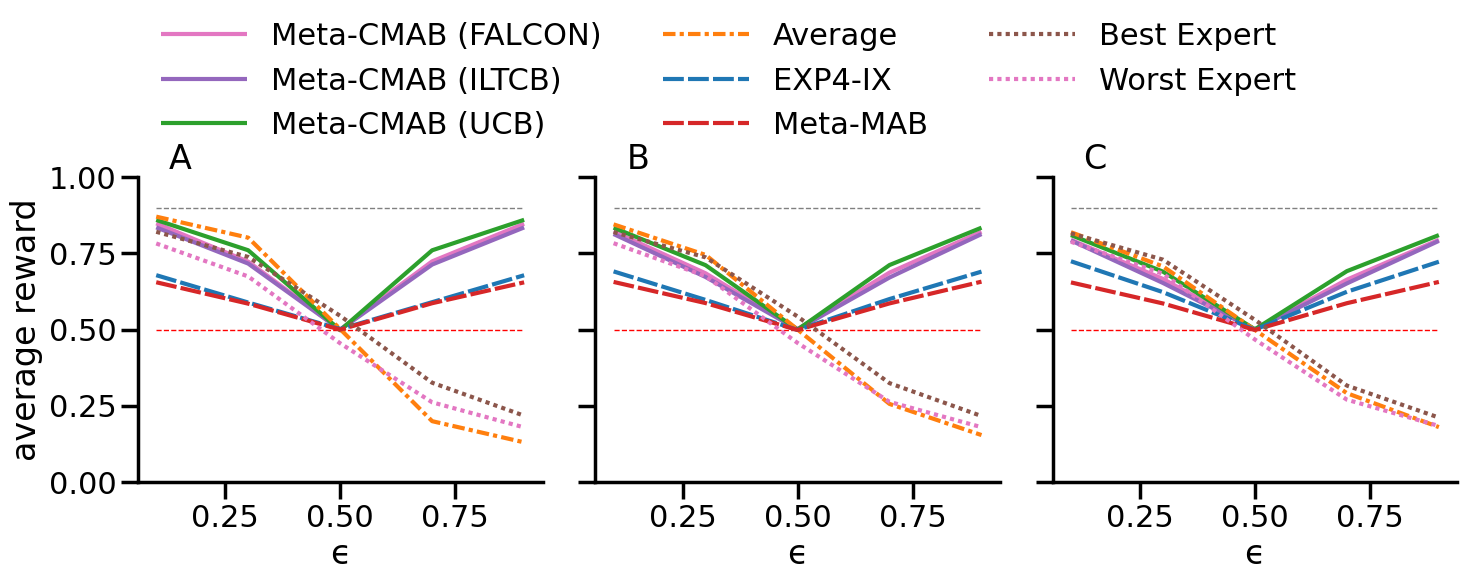

2 True


  0%|          | 0/3 [00:00<?, ?it/s]

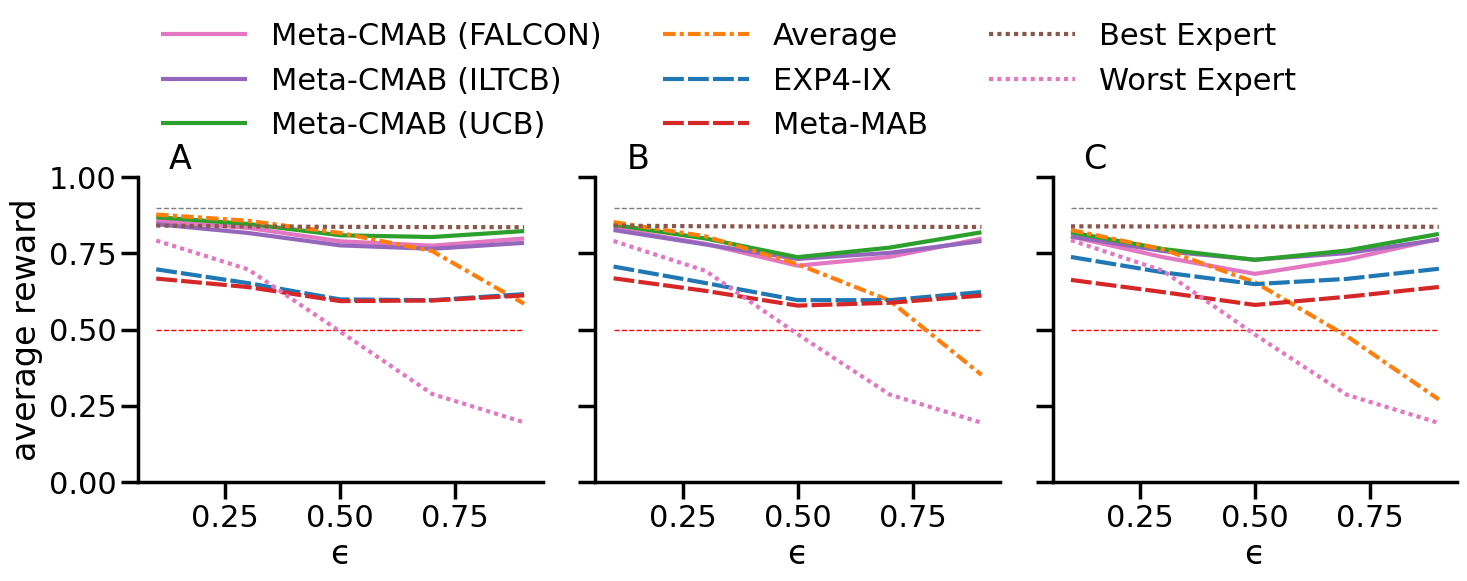

10 False


  0%|          | 0/3 [00:00<?, ?it/s]

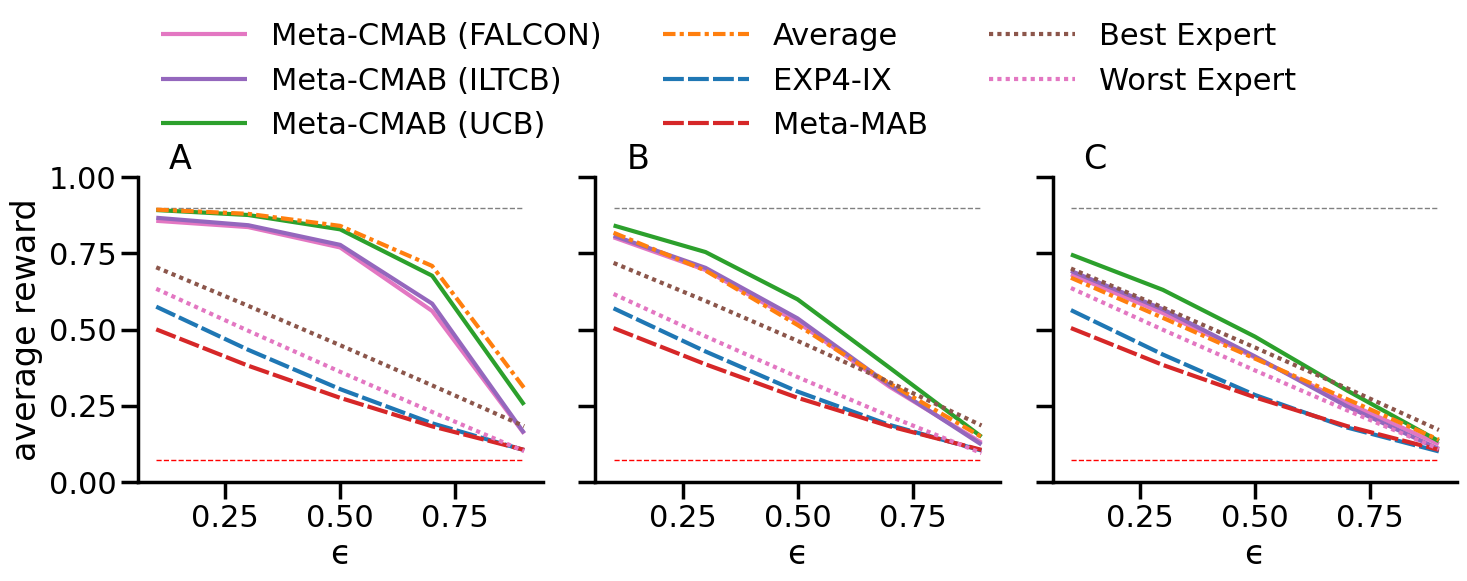

10 True


  0%|          | 0/3 [00:00<?, ?it/s]

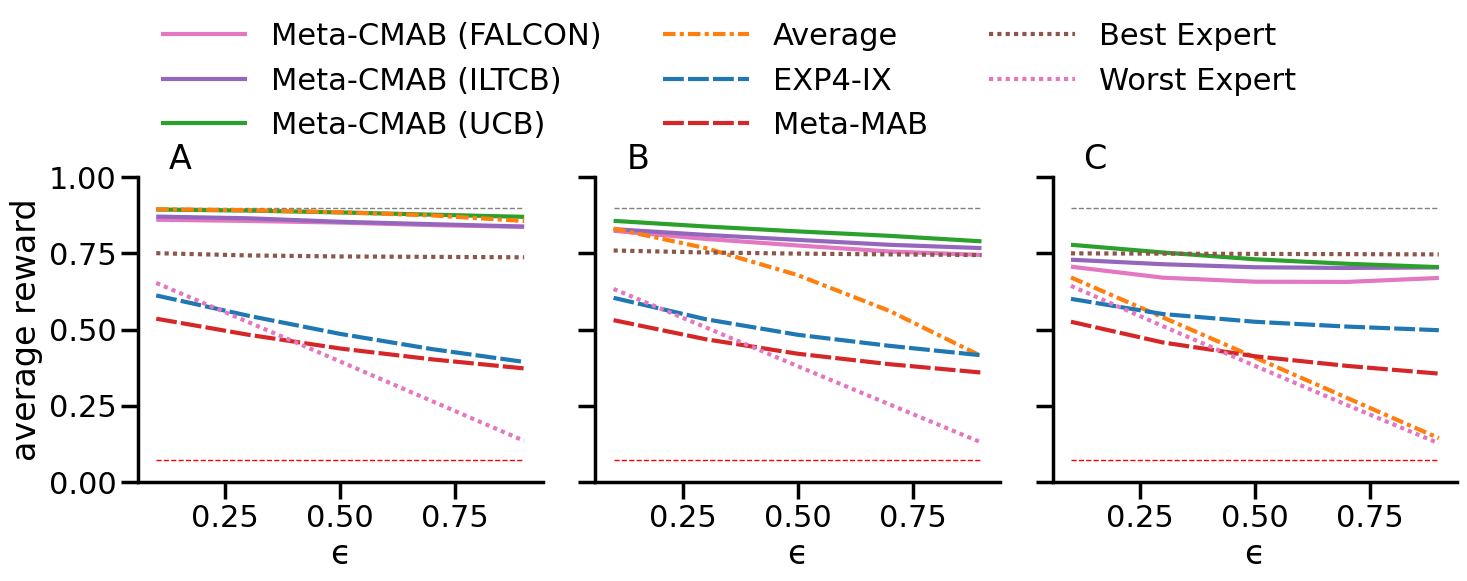

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("poster")
row = None
col = 'Correlation' #None# 'n_clusters'
style = 'correlated errors'
row = 'bernoulli'
x_axis = 'ϵ'
yaxis='average reward'
ALPHA=1

for shape in (2,10):
        for spread_variance in (False,True):
                print(shape,spread_variance)
                plotdf = gdf[(True)
                        # &(gdf.algorithm!='Average') 
                                 &alg_mask
                                        &(gdf['n_trials'].isin([100]))
                                        &(gdf['shape'].isin([shape]))
                                        &(gdf['desired_covar']!=2)
                                        &(gdf['n_clusters'].isin([2]))
                                        &(gdf['bernoulli'].isin([True]))
                                        &(gdf['variance_spread'].isin([spread_variance]))
                                        &(~gdf.algorithm.str.contains("expert"))
                                        
                                        ]
                col_values=["Low","Medium","High"]
                for k in ('Meta-CMAB_1TS','Meta-CMAB_1TSb','Meta-CMAB_0.1TS','Meta-CMAB_0.1TSb',):
                        linestyles[k]=(1,1)
                palette['Meta-CMAB_1TS']='yellow'
                palette['Meta-CMAB_1TSb']='blue'
                palette['Meta-CMAB_0.1TS']='black'
                palette['Meta-CMAB_0.1']='C2'
                palette['Meta-CMAB_0.1TSb']='green'
                methods = [v for v in plotdf.Method.unique() if v not in ("optimal","random")]
                methods=sorted(methods, key =lambda s: ('Meta-CMAB' not in s,'Expert' in s, s))
                g = sns.relplot(data=plotdf[(~plotdf.algorithm.str.contains("optimal"))
                                                &(~plotdf.algorithm.str.contains("random"))],
                                        y=yaxis,x=x_axis,hue="Method",col_order=col_values,hue_order=methods,palette=palette,ci=None,kind='line',legend=False,style='Method',dashes=linestyles,row=row,col=col)

                # for ax_rows,row_name in tqdm(zip(g.axes,col_defaults[row]),total=len(col_defaults[row])):

                labels = "ABCDEFGH"
                label_idx = 0
                for ax_rows in g.axes:
                        for ax,col_name in tqdm(zip(ax_rows,col_values),total=len(col_values)):

                                random_values = plotdf[(plotdf[col]==col_name)&(plotdf.algorithm.str.contains("optimal"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                                ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='grey',linestyle='--',linewidth=1)
                                random_values = plotdf[(plotdf[col]==col_name)&(plotdf.algorithm.str.contains("random"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                                ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='red',linestyle='--',linewidth=1)
                                ax.set_title(labels[label_idx].upper()+"                              ")
                                label_idx+=1

                h = plt.gca().get_lines()
                h2=[]
                from matplotlib.lines import Line2D
                for k in methods:
                        h2.append(Line2D([0],[0],color=palette[k],dashes=linestyles[k], label=k))
                h=h2#+h[-2:]
                new_hues =list( methods)
                # new_hues +=  ["Optimal","Random Policy"]

                lg = ax.legend(loc='upper center', bbox_to_anchor=(-.8, 1.45+(.15 if True else .25 )),
                                fancybox=True, shadow=True, ncol=3,handles=h[:],labels= new_hues,handlelength=2.8, frameon =False)
                # plt.xscale("log")
                plt.ylim(0,1)
                os.makedirs('figures',exist_ok=True)
                plt.savefig(f'figures/{"regr" if shape==2 else "class"}_correlation_error{"_het" if spread_variance else "_hom"}.pdf', bbox_extra_artists=(lg ,) , bbox_inches='tight')
                plt.show()

10 True


  0%|          | 0/3 [00:00<?, ?it/s]

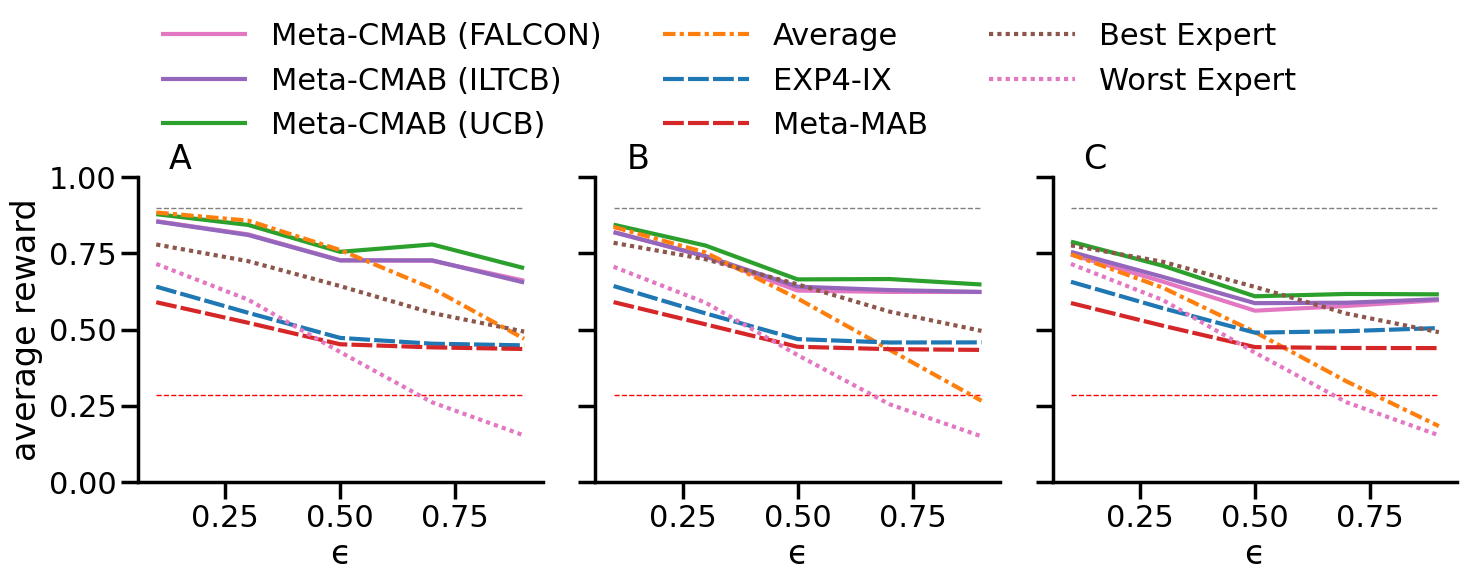

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("poster")
row = None
col = 'Correlation' #None# 'n_clusters'
style = 'correlated errors'
row = 'bernoulli'
x_axis = 'ϵ'
yaxis='average reward'
ALPHA=1
print(shape,spread_variance)
plotdf = gdf[(True)
        # &(gdf.algorithm!='Average') 
                      &alg_mask
                        &(gdf['n_trials'].isin([100]))
                        # &(gdf['shape'].isin([shape]))
                        &(gdf['desired_covar']!=2)
                        &(gdf['n_clusters'].isin([2]))
                        &(gdf['bernoulli'].isin([True]))
                        # &(gdf['variance_spread'].isin([spread_variance]))
                        &(~gdf.algorithm.str.contains("expert"))
                        
                        ]
col_values=["Low","Medium","High"]

for k in ('Meta-CMAB_1TS','Meta-CMAB_1TSb','Meta-CMAB_0.1TS','Meta-CMAB_0.1TSb',):
        linestyles[k]=(1,1)
palette['Meta-CMAB_1TS']='yellow'
palette['Meta-CMAB_1TSb']='blue'
palette['Meta-CMAB_0.1TS']='black'
palette['Meta-CMAB_0.1']='C2'
palette['Meta-CMAB_0.1TSb']='green'
methods = [v for v in plotdf.Method.unique() if v not in ("optimal","random")]
methods=sorted(methods, key =lambda s: ('Meta-CMAB' not in s,'Expert' in s, s))
g = sns.relplot(data=plotdf[(~plotdf.algorithm.str.contains("optimal"))
                                &(~plotdf.algorithm.str.contains("random"))],
                        y=yaxis,x=x_axis,hue="Method",col_order=col_values,hue_order=methods,palette=palette,ci=None,kind='line',legend=False,style='Method',dashes=linestyles,row=row,col=col)

# for ax_rows,row_name in tqdm(zip(g.axes,col_defaults[row]),total=len(col_defaults[row])):

labels = "ABCDEFGH"
label_idx = 0
for ax_rows in g.axes:
        for ax,col_name in tqdm(zip(ax_rows,col_values),total=len(col_values)):

                random_values = plotdf[(plotdf[col]==col_name)&(plotdf.algorithm.str.contains("optimal"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='grey',linestyle='--',linewidth=1)
                random_values = plotdf[(plotdf[col]==col_name)&(plotdf.algorithm.str.contains("random"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='red',linestyle='--',linewidth=1)
                ax.set_title(labels[label_idx].upper()+"                              ")
                label_idx+=1

h = plt.gca().get_lines()
h2=[]
from matplotlib.lines import Line2D
for k in methods:
        h2.append(Line2D([0],[0],color=palette[k],dashes=linestyles[k], label=k))
h=h2#+h[-2:]
new_hues =list( methods)
# new_hues +=  ["Optimal","Random Policy"]

lg = ax.legend(loc='upper center', bbox_to_anchor=(-.8, 1.45+(.15 if True else .25 )),
                fancybox=True, shadow=True, ncol=3,handles=h[:],labels= new_hues,handlelength=2.8, frameon =False)
# plt.xscale("log")
plt.ylim(0,1)
os.makedirs('figures',exist_ok=True)
plt.savefig(f'figures/correlation_error.pdf', bbox_extra_artists=(lg ,) , bbox_inches='tight')
plt.show()

### PLOT BY N TRIALS

2 False


  0%|          | 0/3 [00:00<?, ?it/s]

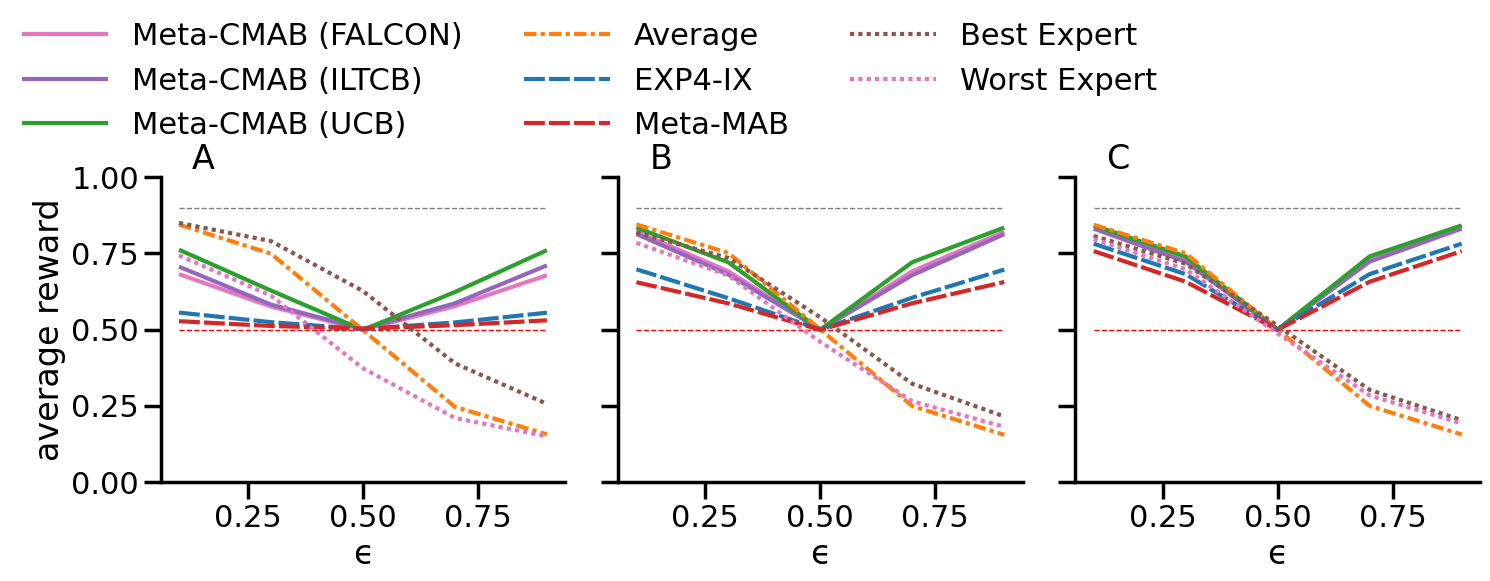

2 True


  0%|          | 0/3 [00:00<?, ?it/s]

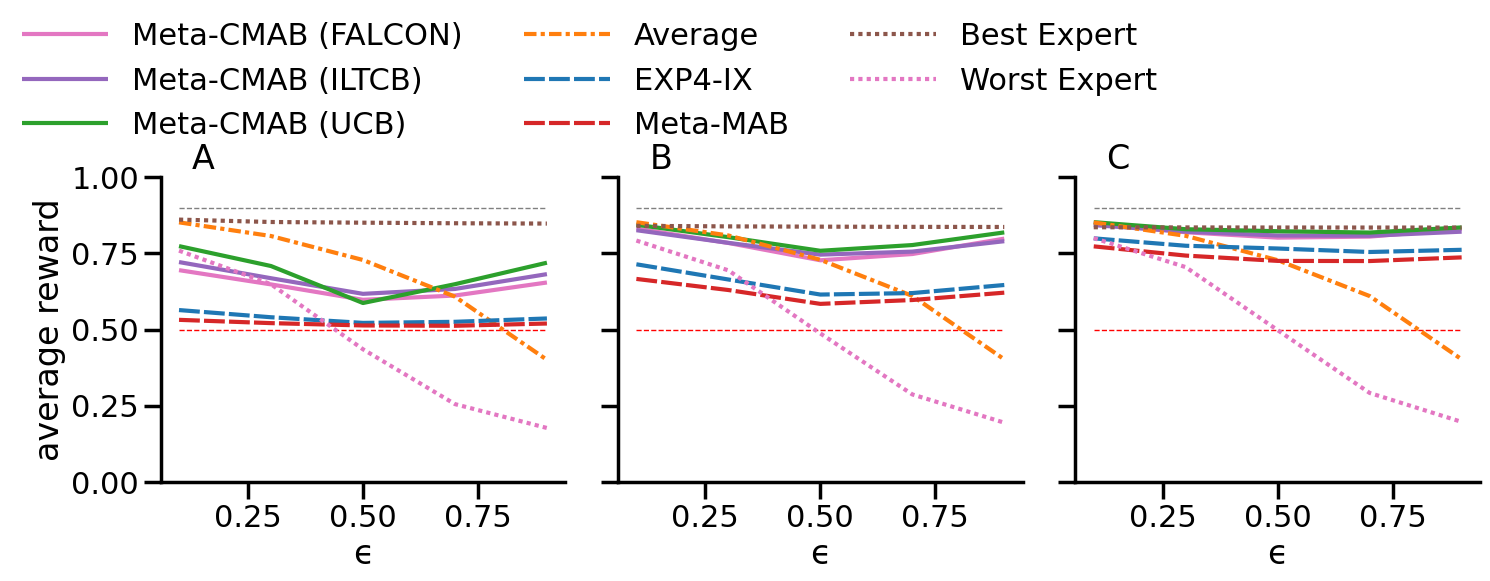

10 False


  0%|          | 0/3 [00:00<?, ?it/s]

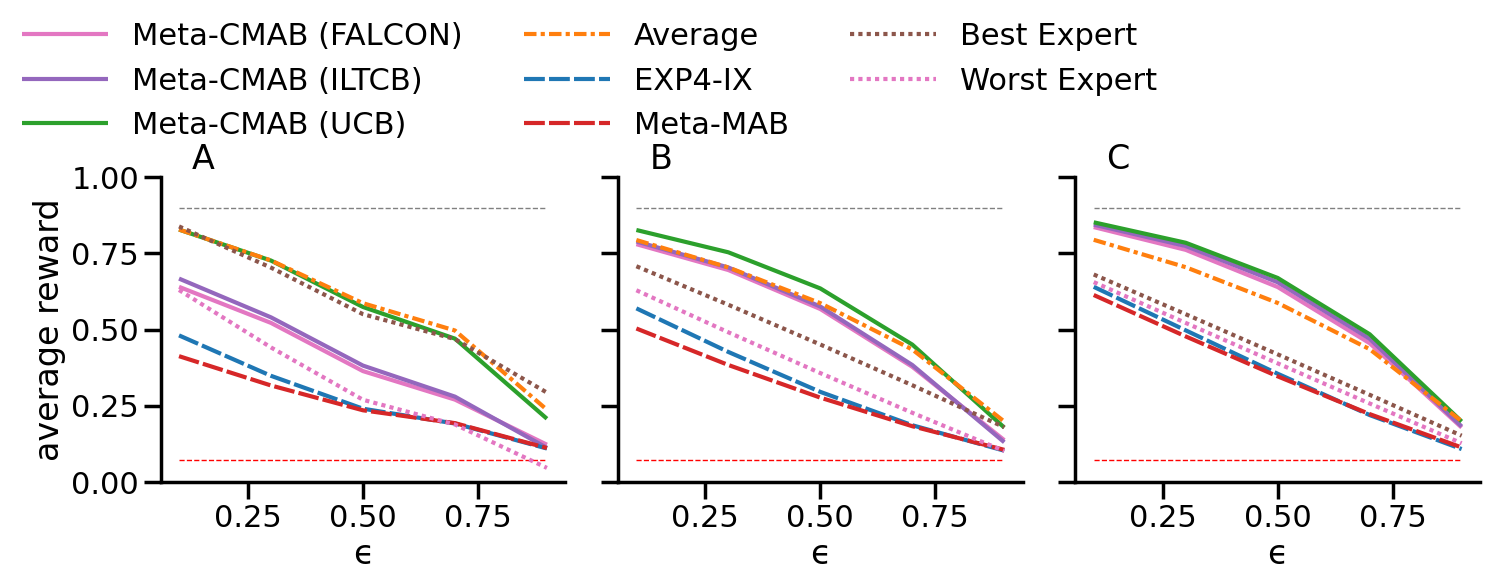

10 True


  0%|          | 0/3 [00:00<?, ?it/s]

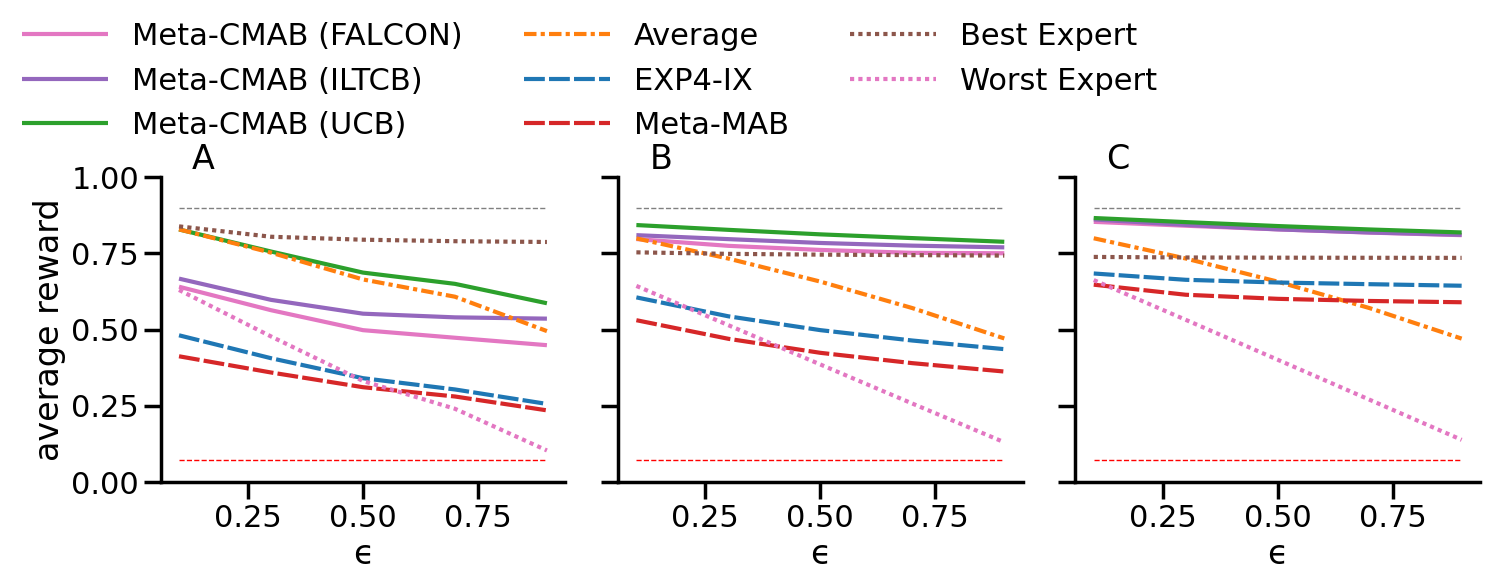

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("poster")
row = None#'Correlation'
col = 'Correlation' #None# 'n_clusters'
col = 'n_trials' #None# 'n_clusters'
style = 'correlated errors'
style = None
x_axis = 'ϵ'
yaxis='average reward'
ALPHA=1
for shape in (2,10):
        
        for spread_variance in (False,True):
                print(shape,spread_variance)
                plotdf = gdf[(True)
                        # &(gdf.algorithm!='Average') 
                                        &alg_mask
                                        # &(gdf['n_trials'].isin([100]))
                                        &(gdf['desired_covar']!=2)
                                        &(gdf['n_clusters'].isin([2]))
                                        &(gdf['shape']==shape)
                                        # &(gdf['K'].isin([16]))
                                        # &(gdf['N'].isin([16]))
                                        &(gdf['variance_spread'].isin([spread_variance]))
                                        &(gdf['bernoulli'].isin([True]))
                                        &(~gdf.algorithm.str.contains("expert"))
                                        
                                        ]
                col_values=[t for t in [10,100,1000,10000] if t in gdf.n_trials.unique()]
                
                methods = [v for v in plotdf.Method.unique() if v not in ("optimal","random")]
                methods=sorted(methods, key =lambda s: ('Meta-CMAB' not in s,'Expert' in s, s))
                g = sns.relplot(data=plotdf[(~plotdf.algorithm.str.contains("optimal"))
                                                &(~plotdf.algorithm.str.contains("random"))],
                                        y=yaxis,x=x_axis,col_order=col_values,hue="Method",hue_order=methods,palette=palette,ci=None,kind='line',legend=False,style='Method',dashes=linestyles,row=row,col=col)

                # for ax_rows,row_name in tqdm(zip(g.axes,col_defaults[row]),total=len(col_defaults[row])):

                labels = "ABCDEFGHIJKLMNOPQRST"
                label_idx = 0
                for ax_rows in g.axes:
                        for ax,col_name in tqdm(zip(ax_rows,sorted(plotdf[col].unique())),total=len(sorted(plotdf[col].unique()))):

                                random_values = plotdf[(plotdf[col]==col_name)&(plotdf.algorithm.str.contains("optimal"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                                ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='grey',linestyle='--',linewidth=1)
                                random_values = plotdf[(plotdf[col]==col_name)&(plotdf.algorithm.str.contains("random"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                                ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='red',linestyle='--',linewidth=1)
                                ax.set_title(labels[label_idx].upper()+"                              ")
                                label_idx+=1

                h = plt.gca().get_lines()
                h2=[]
                from matplotlib.lines import Line2D
                for k in methods:
                        h2.append(Line2D([0],[0],color=palette[k],dashes=linestyles[k], label=k))
                h=h2#+h[-2:]
                new_hues =list( methods)
                # new_hues +=  ["Optimal","Random Policy"]
                if len(plotdf)>0:
                        lg = ax.legend(loc='upper center', bbox_to_anchor=(-1.2, 1.45+(.15 if True else .25 )),
                                        fancybox=True, shadow=True, ncol=3,handles=h[:],labels= new_hues,handlelength=2.8, frameon =False)

                        plt.ylim(0,1)
                        # plt.xscale('log')
                        os.makedirs('figures',exist_ok=True)
                        plt.savefig(f'figures/{"class_" if shape==10 else "regr_"}trials_errors{"_het" if spread_variance else "_hom"}.pdf', bbox_extra_artists=(lg ,) , bbox_inches='tight')

                plt.show()

2 False


  0%|          | 0/5 [00:00<?, ?it/s]

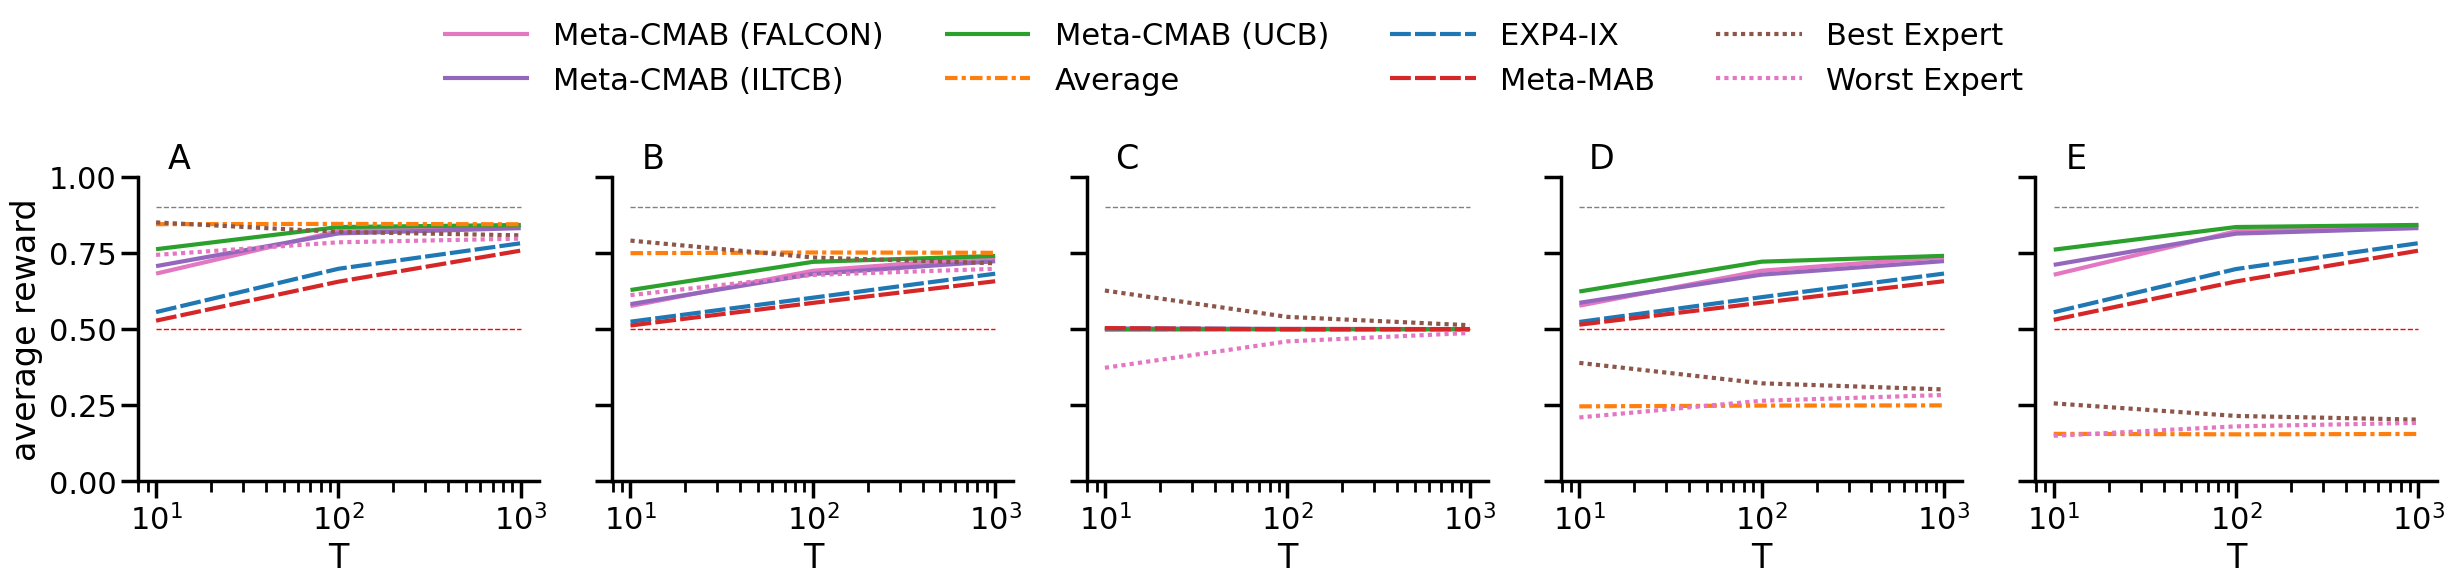

2 True


  0%|          | 0/5 [00:00<?, ?it/s]

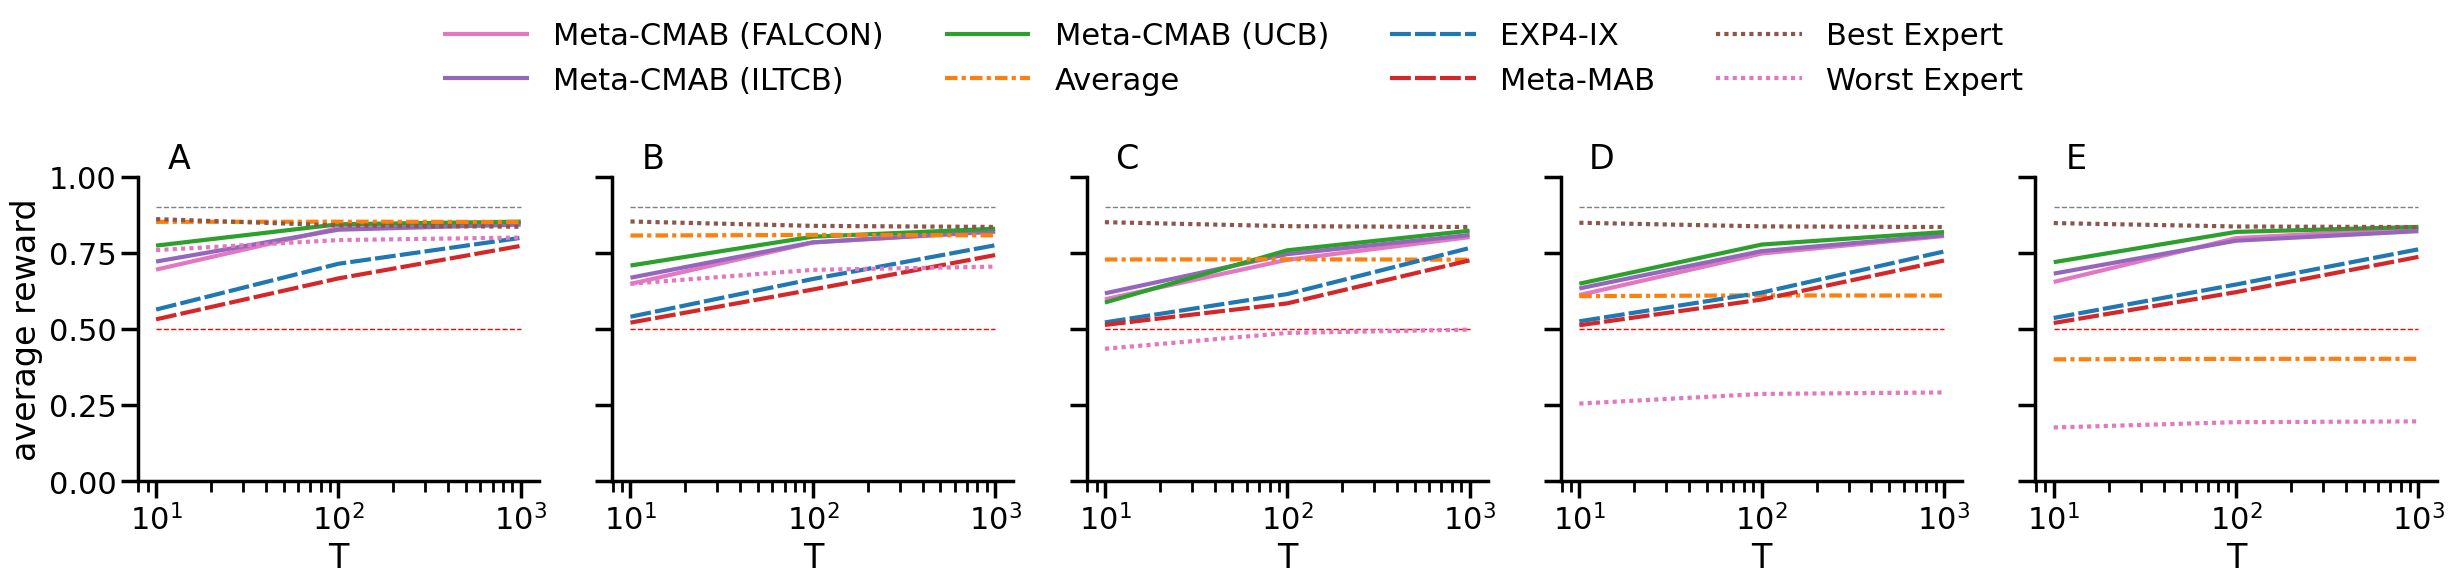

10 False


  0%|          | 0/5 [00:00<?, ?it/s]

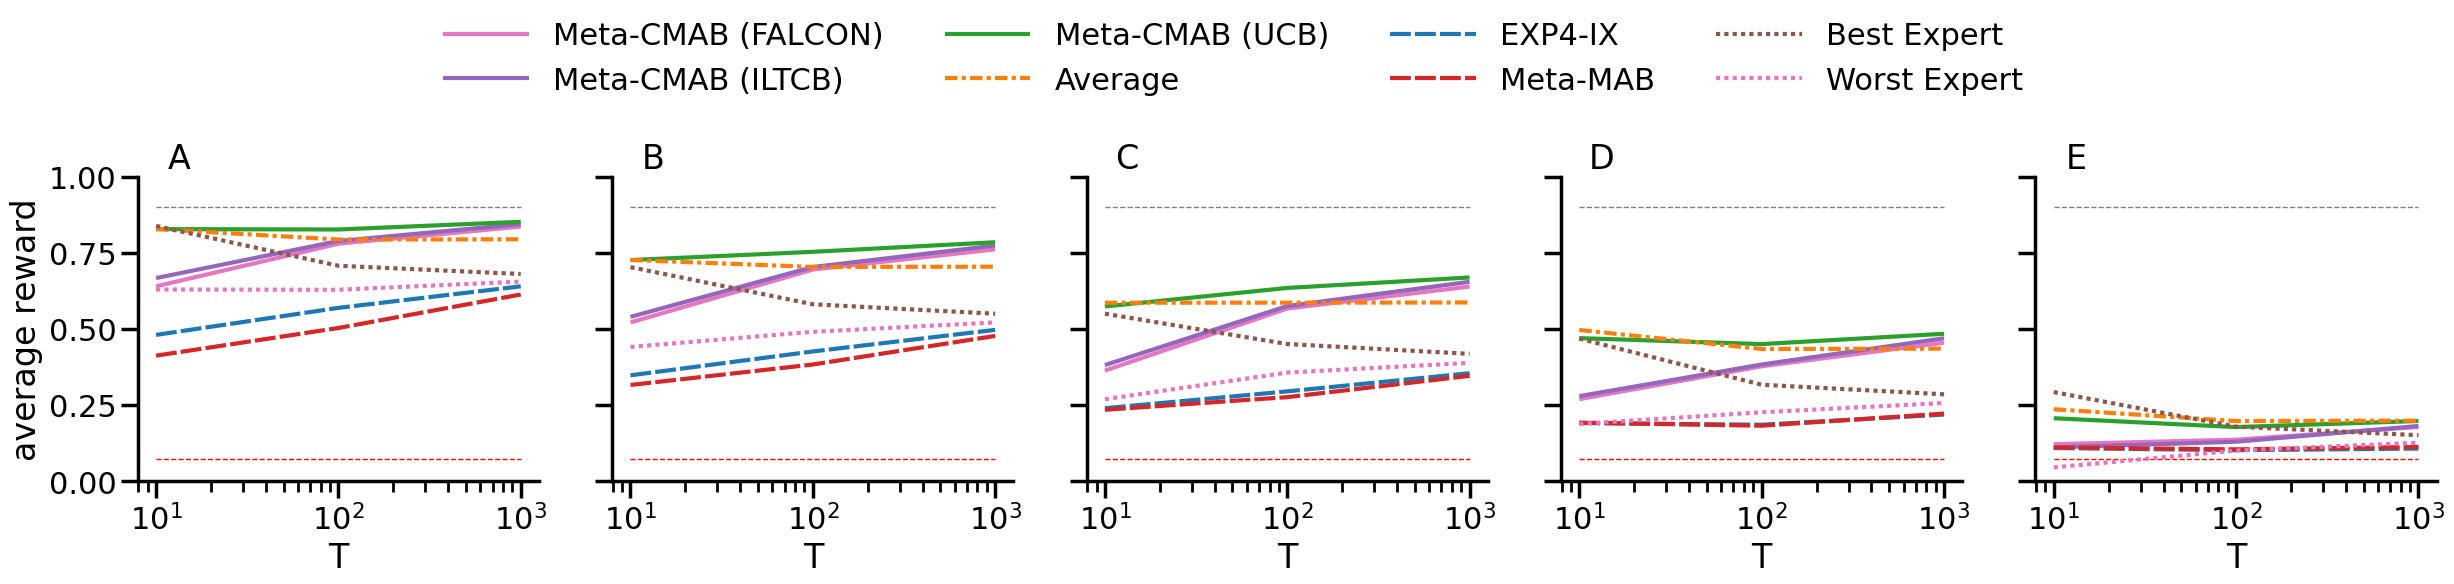

10 True


  0%|          | 0/5 [00:00<?, ?it/s]

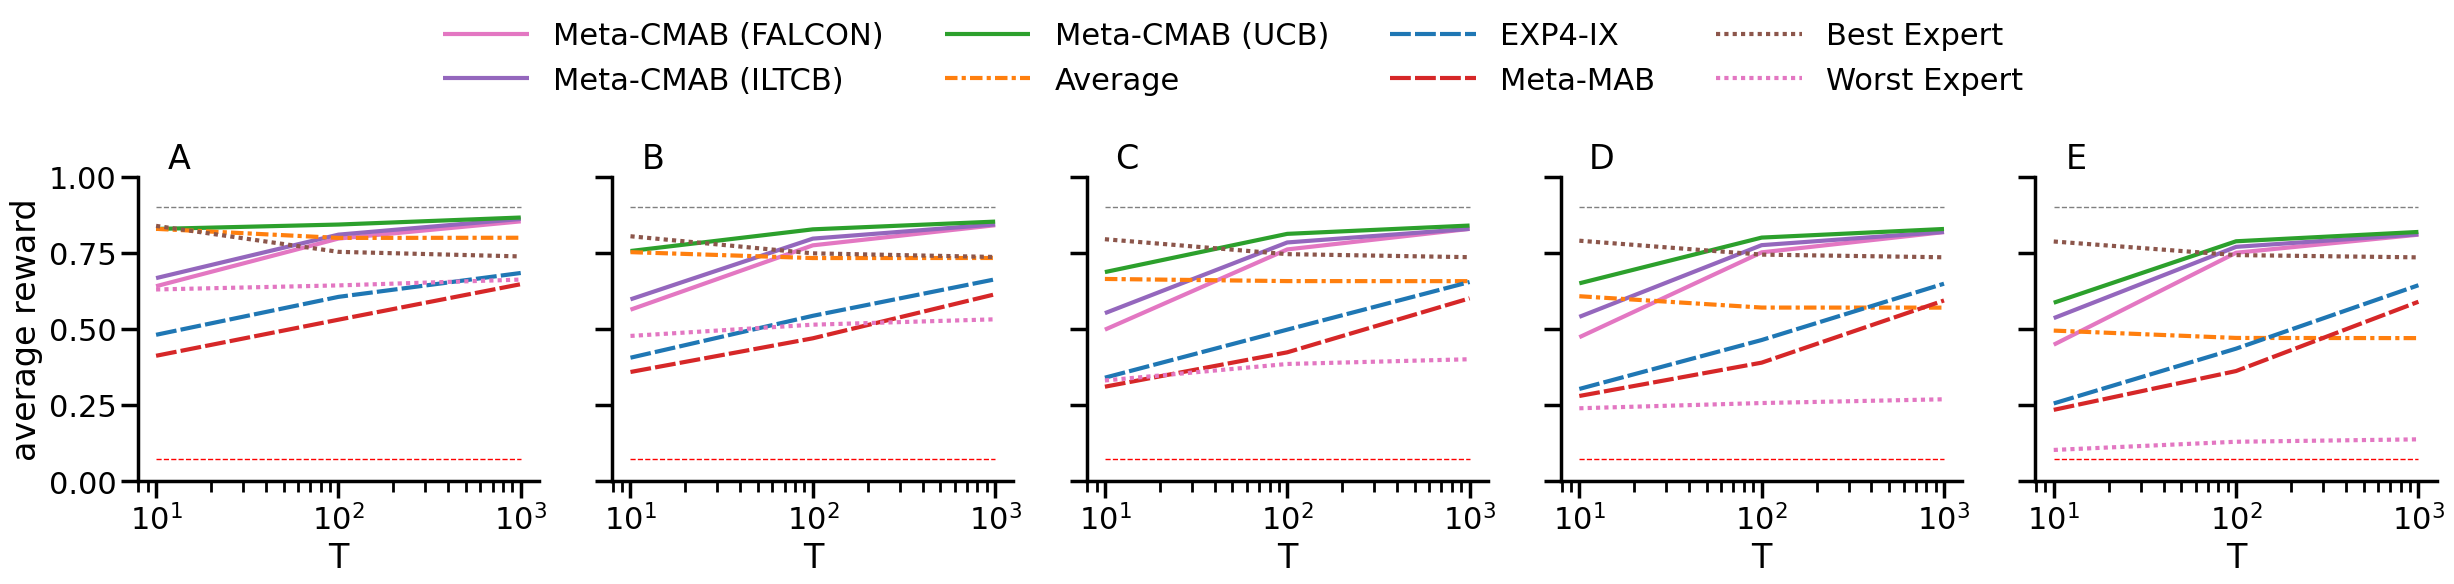

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("poster")
row = None#'Correlation'
col = 'Correlation' #None# 'n_clusters'
col = 'ϵ' #None# 'n_clusters'
style = 'correlated errors'
style = None
x_axis = 'T'
yaxis='average reward'
ALPHA=1
gdf["T"]=gdf["n_trials"]
for shape in (2,10):
        
        for spread_variance in (False,True):
                print(shape,spread_variance)
                plotdf = gdf[(True)
                        # &(gdf.algorithm!='Average') 
                                    &alg_mask 
                                        # &(gdf['n_trials'].isin([100]))
                                        &(gdf['desired_covar']!=2)
                                        &(gdf['n_clusters'].isin([2]))
                                        &(gdf['shape']==shape)
                                        # &(gdf['K'].isin([16]))
                                        # &(gdf['N'].isin([16]))
                                        &(gdf['variance_spread'].isin([spread_variance]))
                                        &(gdf['bernoulli'].isin([True]))
                                        &(~gdf.algorithm.str.contains("expert"))
                                        
                                        ]
               
                methods = [v for v in plotdf.Method.unique() if v not in ("optimal","random")]
                methods=sorted(methods, key =lambda s: ('Meta-CMAB' not in s,'Expert' in s, s))
                g = sns.relplot(data=plotdf[(~plotdf.algorithm.str.contains("optimal"))
                                                &(~plotdf.algorithm.str.contains("random"))],
                                        y=yaxis,x=x_axis,hue="Method",hue_order=methods,palette=palette,ci=None,kind='line',legend=False,style='Method',dashes=linestyles,row=row,col=col)

                # for ax_rows,row_name in tqdm(zip(g.axes,col_defaults[row]),total=len(col_defaults[row])):

                labels = "ABCDEFGHIJKLMNOPQRST"
                label_idx = 0
                for ax_rows in g.axes:
                        for ax,col_name in tqdm(zip(ax_rows,sorted(plotdf[col].unique())),total=len(sorted(plotdf[col].unique()))):

                                random_values = plotdf[(plotdf[col]==col_name)&(plotdf.algorithm.str.contains("optimal"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                                ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='grey',linestyle='--',linewidth=1)
                                random_values = plotdf[(plotdf[col]==col_name)&(plotdf.algorithm.str.contains("random"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                                ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='red',linestyle='--',linewidth=1)
                                ax.set_title(labels[label_idx].upper()+"                              ")
                                label_idx+=1

                h = plt.gca().get_lines()
                h2=[]
                from matplotlib.lines import Line2D
                for k in methods:
                        h2.append(Line2D([0],[0],color=palette[k],dashes=linestyles[k], label=k))
                h=h2#+h[-2:]
                new_hues =list( methods)
                # new_hues +=  ["Optimal","Random Policy"]
                if len(plotdf)>0:
                        # lg = ax.legend(loc='upper center', bbox_to_anchor=(-.8, 1.45+(.15 if True else .25 )),
                        #                 fancybox=True, shadow=True, ncol=3,handles=h[:],labels= new_hues,handlelength=2.8, frameon =False)

                        lg = ax.legend(loc='upper center', bbox_to_anchor=(-2, 1.45+(.15 if True else .25 )),
                                        fancybox=True, shadow=True, ncol=4,handles=h[:],labels= new_hues,handlelength=2.8, frameon =False)

                        plt.ylim(0,1)
                        plt.xscale('log')
                        os.makedirs('figures',exist_ok=True)
                        plt.savefig(f'figures/{"class_" if shape==10 else "regr_"}trials_errors{"_het" if spread_variance else "_hom"}.pdf', bbox_extra_artists=(lg ,) , bbox_inches='tight')

                plt.show()

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

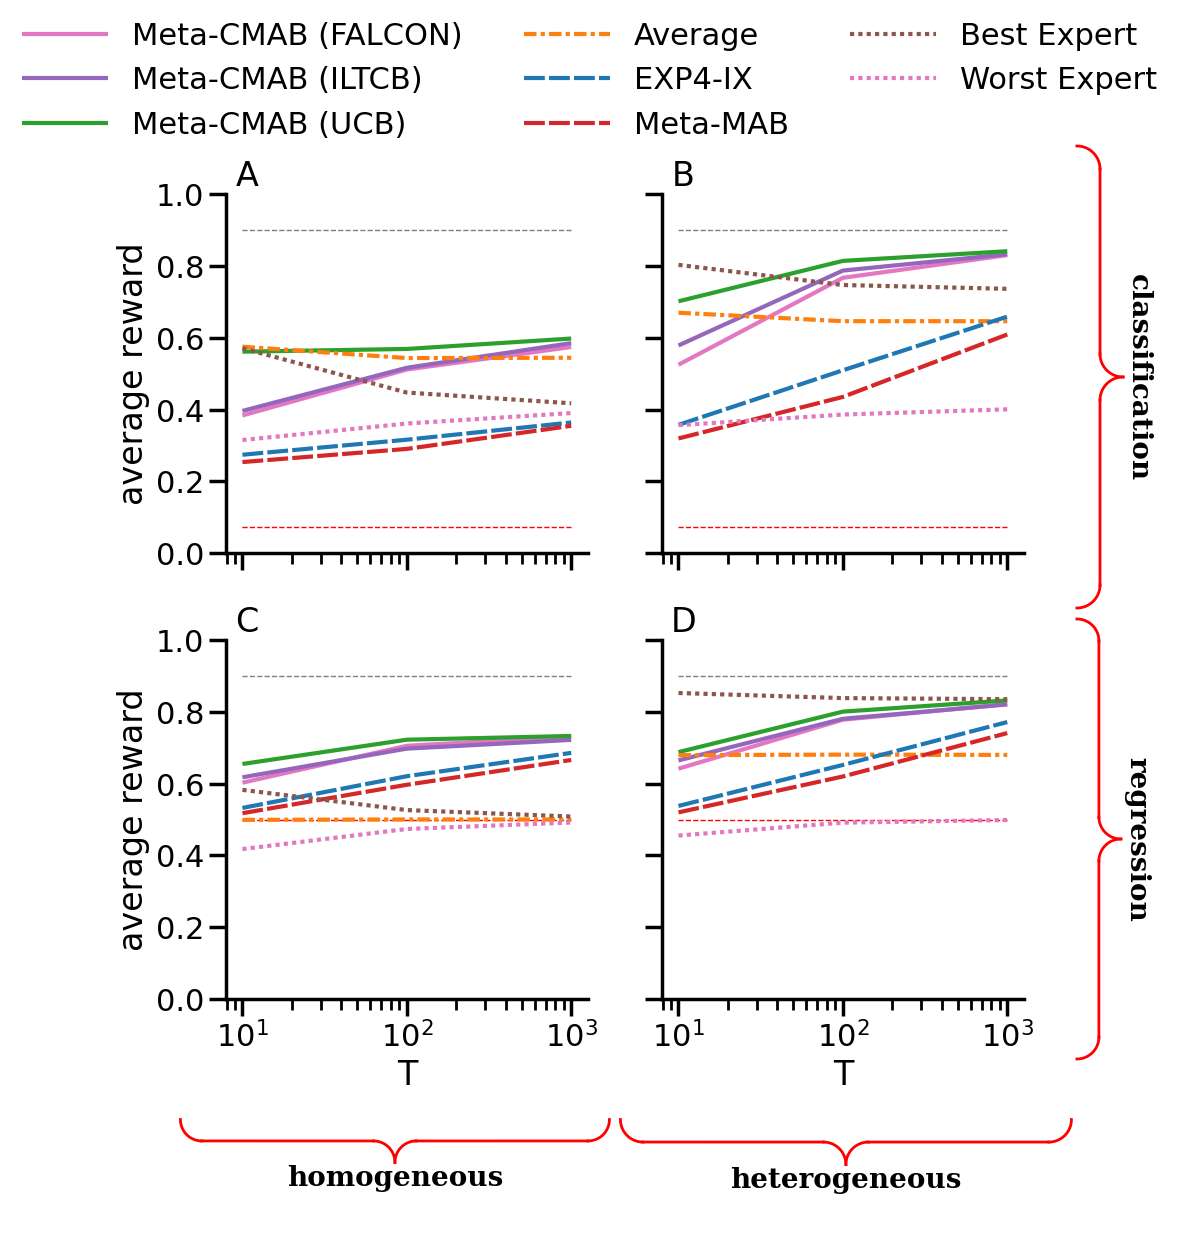

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("poster")
row = 'shape'
# col = 'Correlation' #None# 'n_clusters'
col = 'variance_spread' #None# 'n_clusters'
style = 'correlated errors'
style = None
x_axis = 'T'
yaxis='average reward'
ALPHA=1
if "T" not in gdf.columns:
        gdf["T"]=gdf["n_trials"]

plotdf = gdf[(True)
        # &(gdf.algorithm!='Average') 
                      &alg_mask
                        # &((~gdf.Method.str.contains('Expert'))|(gdf['ϵ']<=0.5))
                        # &((~gdf.Method.str.contains('Expert')))
                        # &(gdf.N==16) 
                        # &(gdf['Correlation'].isin(['Medium']))
                        # &(gdf['n_trials'].isin([100]))
                        &(gdf['bernoulli'].isin([True]))
                        &(gdf['desired_covar']!=2)
                        &(gdf['n_clusters'].isin([2]))
                        #  &(gdf['variance_spread'].isin([False]))
                        &(~gdf.algorithm.str.contains("expert"))
                        
                        ]
row_order = sorted(plotdf[row].unique(),reverse=True)
methods = [v for v in plotdf.Method.unique() if v not in ("optimal","random")]
methods=sorted(methods, key =lambda s: ('Meta-CMAB' not in s,'Expert' in s, s))
g = sns.relplot(data=plotdf[(~plotdf.algorithm.str.contains("optimal"))
                                &(~plotdf.algorithm.str.contains("random"))],
                        y=yaxis,x=x_axis,hue="Method",hue_order=methods,row_order=row_order,palette=palette,ci=None,kind='line',legend=False,style='Method',dashes=linestyles,row=row,col=col)

# for ax_rows,row_name in tqdm(zip(g.axes,col_defaults[row]),total=len(col_defaults[row])):

Ks = sorted(plotdf.K.unique())
labels = "ABCDEFGH"
label_idx = 0
for ax_rows,row_name in zip(g.axes,row_order):
        for ax,col_name in tqdm(zip(ax_rows,sorted(plotdf[col].unique())),total=len(sorted(plotdf[col].unique()))):

                random_values = plotdf[(plotdf[col]==col_name)&(plotdf[row]==row_name)&(plotdf.algorithm.str.contains("optimal"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='grey',linestyle='--',linewidth=1)
                random_values = plotdf[(plotdf[col]==col_name)&(plotdf[row]==row_name)&(plotdf.algorithm.str.contains("random"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='red',linestyle='--',linewidth=1)
                ax.set_title(labels[label_idx].upper()+"                              ")
                label_idx+=1
                # ax.set_xticks([], minor=True)

h = plt.gca().get_lines()
h2=[]
from matplotlib.lines import Line2D
for k in methods:
        h2.append(Line2D([0],[0],color=palette[k],dashes=linestyles[k], label=k))
h=h2#+h[-2:]
new_hues =list( methods)
# new_hues +=  ["Optimal","Random Policy"]

lg = ax.legend(loc='upper center', bbox_to_anchor=(-.2, 2.65+(.15 if True else .25 )),
                fancybox=True, shadow=True, ncol=3,handles=h[:],labels= new_hues,handlelength=2.8, frameon =False)

plt.ylim(0,1)
# plt.xscale('log')
os.makedirs('figures',exist_ok=True)


from curlyBrace import curlyBrace

# coefficient for curly bracket 1
k_r1 = 0.05

font = {'family': 'serif',
        'color':  'k',
        'weight': 'bold',
        # 'style': 'italic',
        'size': 20,
        }


plt.xscale("log")
ax2 = plt.axes([0,-0.1,1.1,1.1], facecolor=(1,1,1,0))
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)
# curlyBrace(plt.gcf(), ax2, [0,0.6], [0,.1], k_r1, bool_auto=False, str_text="homogeneous", color='r', lw=2, int_line_num=1, fontdict=font)

curlyBrace(plt.gcf(), ax2,  [0.905,0.55], [0.905,0.15],k_r1, bool_auto=False, str_text="regression", color='r', lw=2, int_line_num=1, fontdict=font)

curlyBrace(plt.gcf(), ax2,   [0.905,.98],[0.905,.56],k_r1, bool_auto=False, str_text="classification", color='r', lw=2, int_line_num=1, fontdict=font)

curlyBrace(plt.gcf(), ax2,  [0.48,0.095], [0.09,0.095],k_r1, bool_auto=False, str_text="homogeneous", color='r', lw=2, int_line_num=1, fontdict=font)

curlyBrace(plt.gcf(), ax2,   [.9,0.095],[0.49,.095],k_r1, bool_auto=False, str_text="heterogeneous", color='r', lw=2, int_line_num=1, fontdict=font)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_xticks([])
ax2.set_yticks([])
plt.savefig(f'figures/trials.pdf', bbox_extra_artists=(lg ,) , bbox_inches='tight')
plt.show()

  0%|          | 0/2 [00:00<?, ?it/s]

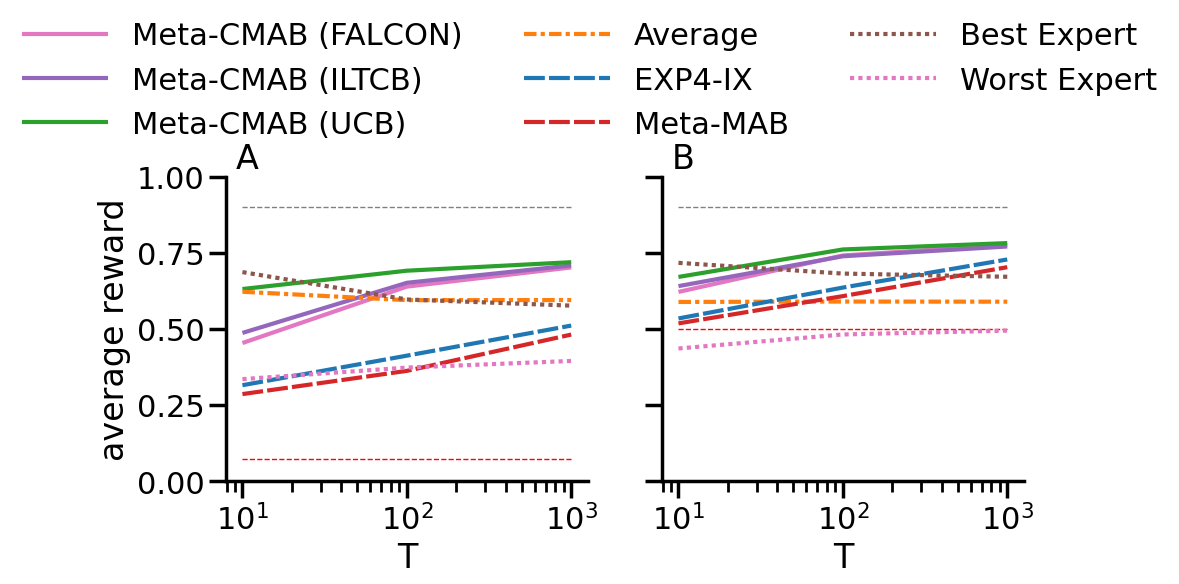

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("poster")
row = None#'shape'
# col = 'Correlation' #None# 'n_clusters'
col = 'shape' #None# 'n_clusters'
style = 'correlated errors'
style = None
x_axis = 'T'
yaxis='average reward'
ALPHA=1
if "T" not in gdf.columns:
        gdf["T"]=gdf["n_trials"]

plotdf = gdf[(True)
        # &(gdf.algorithm!='Average') 
                     &alg_mask
                        # &((~gdf.Method.str.contains('Expert'))|(gdf['ϵ']<=0.5))
                        # &((~gdf.Method.str.contains('Expert')))
                        # &(gdf.N==16) 
                        # &(gdf['Correlation'].isin(['Medium']))
                        # &(gdf['n_trials'].isin([100]))
                        &(gdf['bernoulli'].isin([True]))
                        &(gdf['desired_covar']!=2)
                        &(gdf['n_clusters'].isin([2]))
                        #  &(gdf['variance_spread'].isin([False]))
                        &(~gdf.algorithm.str.contains("expert"))
                        
                        ]
col_order = sorted(plotdf[col].unique(),reverse=True)
methods = [v for v in plotdf.Method.unique() if v not in ("optimal","random")]
methods=sorted(methods, key =lambda s: ('Meta-CMAB' not in s,'Expert' in s, s))
g = sns.relplot(data=plotdf[(~plotdf.algorithm.str.contains("optimal"))
                                &(~plotdf.algorithm.str.contains("random"))],
                        y=yaxis,x=x_axis,hue="Method",col_order=col_order,hue_order=methods,palette=palette,ci=None,kind='line',legend=False,style='Method',dashes=linestyles,row=row,col=col)

# for ax_rows,row_name in tqdm(zip(g.axes,col_defaults[row]),total=len(col_defaults[row])):

Ks = sorted(plotdf.K.unique())
labels = "ABCDEFGH"
label_idx = 0
for ax_rows in g.axes:
        for ax,col_name in tqdm(zip(ax_rows,col_order),total=len(sorted(plotdf[col].unique()))):

                random_values = plotdf[(plotdf[col]==col_name)&(plotdf.algorithm.str.contains("optimal"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='grey',linestyle='--',linewidth=1)
                random_values = plotdf[(plotdf[col]==col_name)&(plotdf.algorithm.str.contains("random"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='red',linestyle='--',linewidth=1)
                ax.set_title(labels[label_idx].upper()+"                              ")
                label_idx+=1
                # ax.set_xticks([], minor=True)

h = plt.gca().get_lines()
h2=[]
from matplotlib.lines import Line2D
for k in methods:
        h2.append(Line2D([0],[0],color=palette[k],dashes=linestyles[k], label=k))
h=h2#+h[-2:]
new_hues =list( methods)
# new_hues +=  ["Optimal","Random Policy"]

lg = ax.legend(loc='upper center', bbox_to_anchor=(-.2, 1.45+(.15 if True else .25 )),
                fancybox=True, shadow=True, ncol=3,handles=h[:],labels= new_hues,handlelength=2.8, frameon =False)

plt.ylim(0,1)
# plt.xscale('log')
os.makedirs('figures',exist_ok=True)


from curlyBrace import curlyBrace

# coefficient for curly bracket 1
k_r1 = 0.05

font = {'family': 'serif',
        'color':  'k',
        'weight': 'bold',
        # 'style': 'italic',
        'size': 20,
        }


plt.xscale("log")

plt.savefig(f'figures/trials_aggr.pdf', bbox_extra_artists=(lg ,) , bbox_inches='tight')
plt.show()

### PLOT BY ARMS

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

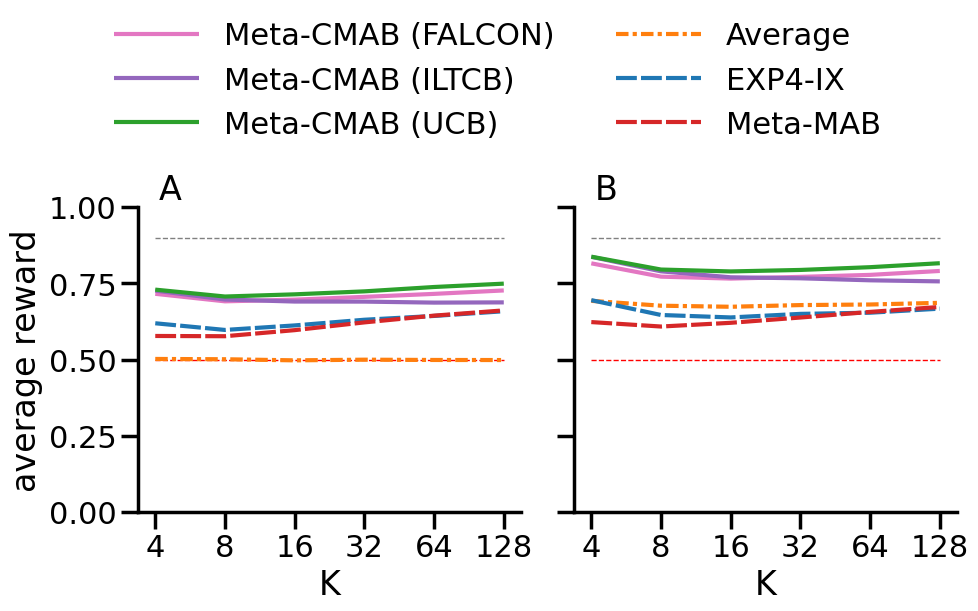

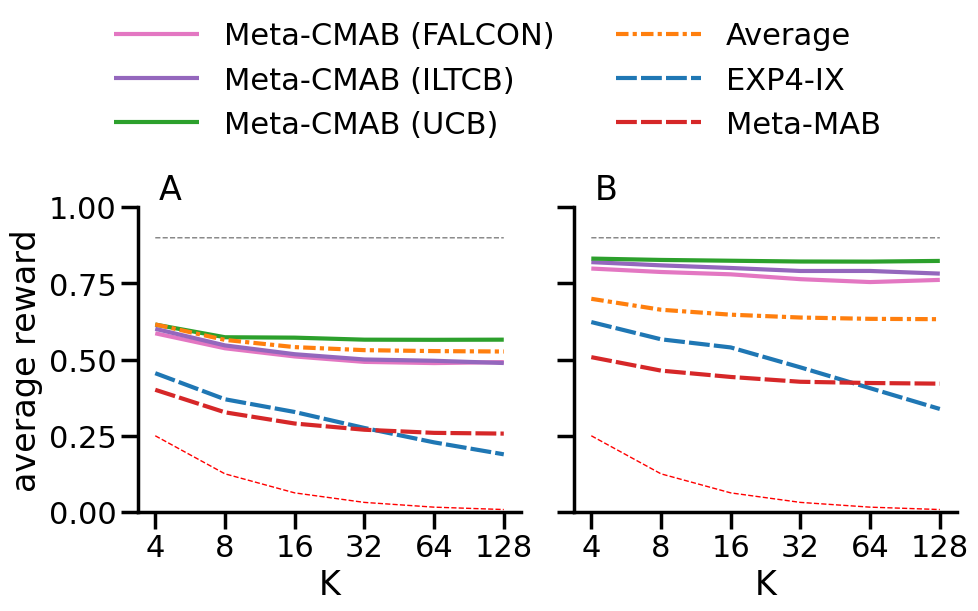

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("poster")
row = None#'variance_spread'
# col = 'Correlation' #None# 'n_clusters'
col = 'variance_spread' #None# 'n_clusters'
style = 'correlated errors'
style = None
x_axis = 'K'
yaxis='average reward'
ALPHA=1


for shape in (2,10):
                
        plotdf = gdf[(True)
                # &(gdf.algorithm!='Average') 
                              &alg_mask
                                # &((~gdf.Method.str.contains('Expert'))|(gdf['ϵ']<=0.5))
                                &((~gdf.Method.str.contains('Expert')))
                                &(gdf.N==16) 
                                &(gdf['n_trials'].isin([100]))
                                &(gdf['bernoulli'].isin([True]))
                                &(gdf['desired_covar']!=2)
                                &(gdf['shape']==shape)
                                &(gdf['n_clusters'].isin([2]))
                                #  &(gdf['variance_spread'].isin([False]))
                                &(~gdf.algorithm.str.contains("expert"))
                                
                                ]
      
        methods = [v for v in plotdf.Method.unique() if v not in ("optimal","random")]
        methods=sorted(methods, key =lambda s: ('Meta-CMAB' not in s,'Expert' in s, s))
        g = sns.relplot(data=plotdf[(~plotdf.algorithm.str.contains("optimal"))
                                        &(~plotdf.algorithm.str.contains("random"))],
                                y=yaxis,x=x_axis,hue="Method",hue_order=methods,palette=palette,ci=None,kind='line',legend=False,style='Method',dashes=linestyles,row=row,col=col)

        # for ax_rows,row_name in tqdm(zip(g.axes,col_defaults[row]),total=len(col_defaults[row])):

        Ks = sorted(plotdf.K.unique())
        labels = "ABCDEFGH"
        label_idx = 0
        g.set(xscale = 'log')
        g.set(xticks = Ks, xticklabels = list(map(str,Ks)))
        for ax_rows in g.axes:
                for ax,col_name in tqdm(zip(ax_rows,sorted(plotdf[col].unique())),total=len(sorted(plotdf[col].unique()))):

                        random_values = plotdf[(plotdf[col]==col_name)&(plotdf.algorithm.str.contains("optimal"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                        ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='grey',linestyle='--',linewidth=1)
                        random_values = plotdf[(plotdf[col]==col_name)&(plotdf.algorithm.str.contains("random"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                        ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='red',linestyle='--',linewidth=1)
                        ax.set_title(labels[label_idx].upper()+"                              ")
                        label_idx+=1
                        ax.set_xticks([], minor=True)

        h = plt.gca().get_lines()
        h2=[]
        from matplotlib.lines import Line2D
        for k in methods:
                h2.append(Line2D([0],[0],color=palette[k],dashes=linestyles[k], label=k))
        h=h2#+h[-2:]
        new_hues =list( methods)
        # new_hues +=  ["Optimal","Random Policy"]

        lg = ax.legend(loc='upper center', bbox_to_anchor=(-.2, 1.55+(.15 if True else .25 )),
                        fancybox=True, shadow=True, ncol=2,handles=h[:],labels= new_hues,handlelength=2.8, frameon =False)

        plt.ylim(0,1)
        # plt.xscale('log')
        os.makedirs('figures',exist_ok=True)
        plt.savefig(f'figures/{"class_" if shape==10 else "regr_"}config_K.pdf', bbox_extra_artists=(lg ,) , bbox_inches='tight')

  0%|          | 0/2 [00:00<?, ?it/s]

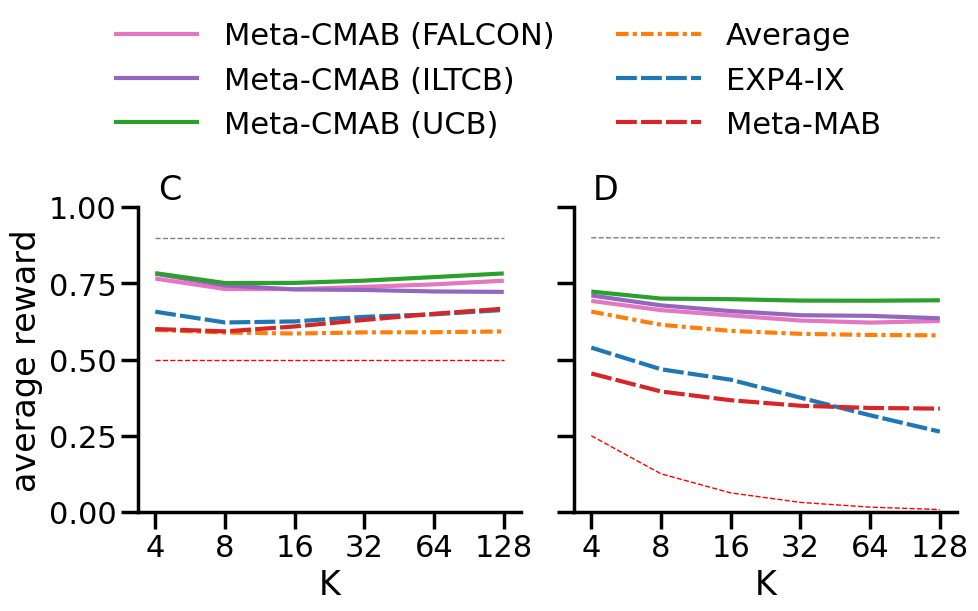

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("poster")
row = None#'variance_spread'
# col = 'Correlation' #None# 'n_clusters'
col = 'shape' #None# 'n_clusters'
style = 'correlated errors'
style = None
x_axis = 'K'
yaxis='average reward'
ALPHA=1


plotdf = gdf[(True)
        # &(gdf.algorithm!='Average') 
                    &alg_mask
                        # &((~gdf.Method.str.contains('Expert'))|(gdf['ϵ']<=0.5))
                        &((~gdf.Method.str.contains('Expert')))
                        &(gdf.N==16) 
                        &(gdf['n_trials'].isin([100]))
                        &(gdf['bernoulli'].isin([True]))
                        &(gdf['desired_covar']!=2)
                        # &(gdf['shape']==shape)
                        &(gdf['n_clusters'].isin([2]))
                        #  &(gdf['variance_spread'].isin([False]))
                        &(~gdf.algorithm.str.contains("expert"))
                        
                        ]

methods = [v for v in plotdf.Method.unique() if v not in ("optimal","random")]
methods=sorted(methods, key =lambda s: ('Meta-CMAB' not in s,'Expert' in s, s))
g = sns.relplot(data=plotdf[(~plotdf.algorithm.str.contains("optimal"))
                                &(~plotdf.algorithm.str.contains("random"))],
                        y=yaxis,x=x_axis,hue="Method",hue_order=methods,palette=palette,ci=None,kind='line',legend=False,style='Method',dashes=linestyles,row=row,col=col)

# for ax_rows,row_name in tqdm(zip(g.axes,col_defaults[row]),total=len(col_defaults[row])):

Ks = sorted(plotdf.K.unique())
labels = "CDEFGH"
label_idx = 0
g.set(xscale = 'log')
g.set(xticks = Ks, xticklabels = list(map(str,Ks)))
for ax_rows in g.axes:
        for ax,col_name in tqdm(zip(ax_rows,sorted(plotdf[col].unique())),total=len(sorted(plotdf[col].unique()))):

                random_values = plotdf[(plotdf[col]==col_name)&(plotdf.algorithm.str.contains("optimal"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='grey',linestyle='--',linewidth=1)
                random_values = plotdf[(plotdf[col]==col_name)&(plotdf.algorithm.str.contains("random"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='red',linestyle='--',linewidth=1)
                ax.set_title(labels[label_idx].upper()+"                              ")
                label_idx+=1
                ax.set_xticks([], minor=True)

h = plt.gca().get_lines()
h2=[]
from matplotlib.lines import Line2D
for k in methods:
        h2.append(Line2D([0],[0],color=palette[k],dashes=linestyles[k], label=k))
h=h2#+h[-2:]
new_hues =list( methods)
# new_hues +=  ["Optimal","Random Policy"]

lg = ax.legend(loc='upper center', bbox_to_anchor=(-.2, 1.55+(.15 if True else .25 )),
                fancybox=True, shadow=True, ncol=2,handles=h[:],labels= new_hues,handlelength=2.8, frameon =False)

plt.ylim(0,1)
# plt.xscale('log')
os.makedirs('figures',exist_ok=True)
plt.savefig(f'figures/config_K.pdf', bbox_extra_artists=(lg ,) , bbox_inches='tight')

### PLOT BY EXPERTS

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

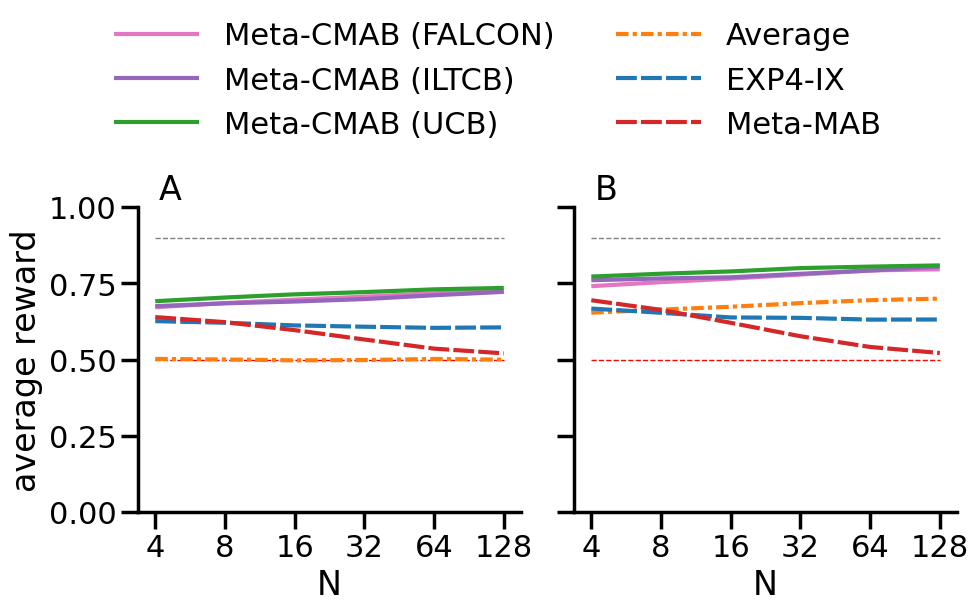

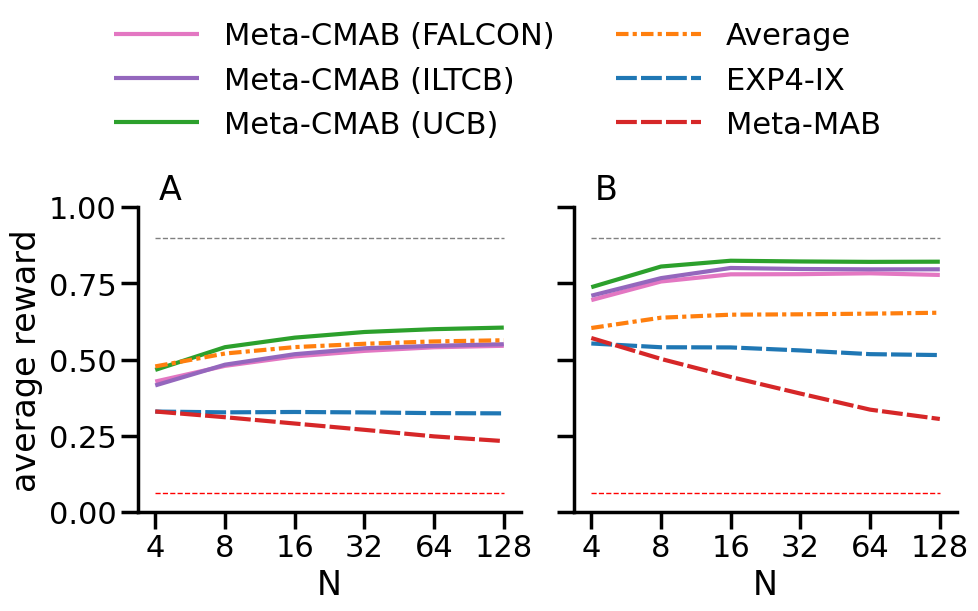

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("poster")
row = None#'variance_spread'
# col = 'Correlation' #None# 'n_clusters'
col = 'variance_spread' #None# 'n_clusters'
style = 'correlated errors'
style = None
x_axis = 'N'
yaxis='average reward'
ALPHA=1


for shape in (2,10):
                
        plotdf = gdf[(True)
                # &(gdf.algorithm!='Average') 
                             &alg_mask
                                # &((~gdf.Method.str.contains('Expert'))|(gdf['ϵ']<=0.5))
                                &((~gdf.Method.str.contains('Expert')))
                                &(gdf.K==16) 
                                &(gdf['n_trials'].isin([100]))
                                &(gdf['bernoulli'].isin([True]))
                                &(gdf['desired_covar']!=2)
                                &(gdf['shape']==shape)
                                &(gdf['n_clusters'].isin([2]))
                                #  &(gdf['variance_spread'].isin([False]))
                                &(~gdf.algorithm.str.contains("expert"))
                                
                                ]
   
        methods = [v for v in plotdf.Method.unique() if v not in ("optimal","random")]
        methods=sorted(methods, key =lambda s: ('Meta-CMAB' not in s,'Expert' in s, s))
        g = sns.relplot(data=plotdf[(~plotdf.algorithm.str.contains("optimal"))
                                        &(~plotdf.algorithm.str.contains("random"))],
                                y=yaxis,x=x_axis,hue="Method",hue_order=methods,palette=palette,ci=None,kind='line',legend=False,style='Method',dashes=linestyles,row=row,col=col)

        # for ax_rows,row_name in tqdm(zip(g.axes,col_defaults[row]),total=len(col_defaults[row])):

        Ns = sorted(plotdf.N.unique())
        labels = "ABCDEFGH"
        label_idx = 0
        g.set(xscale = 'log')
        g.set(xticks = Ns, xticklabels = list(map(str,Ns)))
        for ax_rows in g.axes:
                for ax,col_name in tqdm(zip(ax_rows,sorted(plotdf[col].unique())),total=len(sorted(plotdf[col].unique()))):

                        random_values = plotdf[(plotdf[col]==col_name)&(plotdf.algorithm.str.contains("optimal"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                        ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='grey',linestyle='--',linewidth=1)
                        random_values = plotdf[(plotdf[col]==col_name)&(plotdf.algorithm.str.contains("random"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                        ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='red',linestyle='--',linewidth=1)
                        ax.set_title(labels[label_idx].upper()+"                              ")
                        label_idx+=1
                        ax.set_xticks([], minor=True)

        h = plt.gca().get_lines()
        h2=[]
        from matplotlib.lines import Line2D
        for k in methods:
                h2.append(Line2D([0],[0],color=palette[k],dashes=linestyles[k], label=k))
        h=h2#+h[-2:]
        new_hues =list( methods)
        # new_hues +=  ["Optimal","Random Policy"]

        lg = ax.legend(loc='upper center', bbox_to_anchor=(-.2, 1.55+(.15 if True else .25 )),
                        fancybox=True, shadow=True, ncol=2,handles=h[:],labels= new_hues,handlelength=2.8, frameon =False)

        plt.ylim(0,1)
        # plt.xscale('log')
        os.makedirs('figures',exist_ok=True)
        plt.savefig(f'figures/{"class_" if shape==10 else "regr_"}config_N.pdf', bbox_extra_artists=(lg ,) , bbox_inches='tight')

  0%|          | 0/2 [00:00<?, ?it/s]

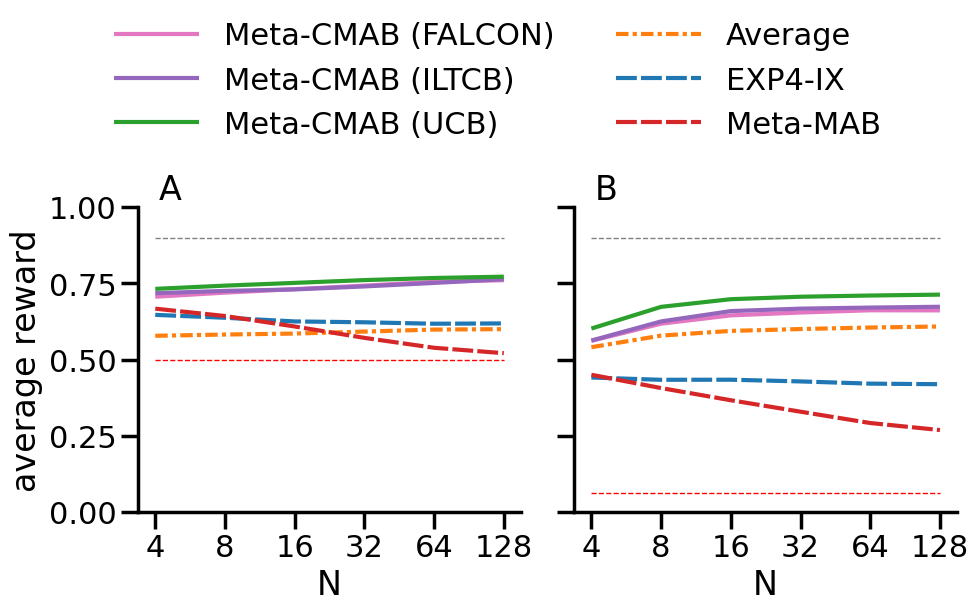

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("poster")
row = None#'variance_spread'
# col = 'Correlation' #None# 'n_clusters'
col = 'shape' #None# 'n_clusters'
style = 'correlated errors'
style = None
x_axis = 'N'
yaxis='average reward'
ALPHA=1


plotdf = gdf[(True)
        # &(gdf.algorithm!='Average') 
                        &alg_mask
                        # &((~gdf.Method.str.contains('Expert'))|(gdf['ϵ']<=0.5))
                        &((~gdf.Method.str.contains('Expert')))
                        &(gdf.K==16) 
                        &(gdf['n_trials'].isin([100]))
                        &(gdf['bernoulli'].isin([True]))
                        &(gdf['desired_covar']!=2)
                        # &(gdf['shape']==shape)
                        &(gdf['n_clusters'].isin([2]))
                        #  &(gdf['variance_spread'].isin([False]))
                        &(~gdf.algorithm.str.contains("expert"))
                        
                        ]

methods = [v for v in plotdf.Method.unique() if v not in ("optimal","random")]
methods=sorted(methods, key =lambda s: ('Meta-CMAB' not in s,'Expert' in s, s))
g = sns.relplot(data=plotdf[(~plotdf.algorithm.str.contains("optimal"))
                                &(~plotdf.algorithm.str.contains("random"))],
                        y=yaxis,x=x_axis,hue="Method",hue_order=methods,palette=palette,ci=None,kind='line',legend=False,style='Method',dashes=linestyles,row=row,col=col)

# for ax_rows,row_name in tqdm(zip(g.axes,col_defaults[row]),total=len(col_defaults[row])):

Ns = sorted(plotdf.N.unique())
labels = "ABCDEFGH"
label_idx = 0
g.set(xscale = 'log')
g.set(xticks = Ns, xticklabels = list(map(str,Ns)))
for ax_rows in g.axes:
        for ax,col_name in tqdm(zip(ax_rows,sorted(plotdf[col].unique())),total=len(sorted(plotdf[col].unique()))):

                random_values = plotdf[(plotdf[col]==col_name)&(plotdf.algorithm.str.contains("optimal"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='grey',linestyle='--',linewidth=1)
                random_values = plotdf[(plotdf[col]==col_name)&(plotdf.algorithm.str.contains("random"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='red',linestyle='--',linewidth=1)
                ax.set_title(labels[label_idx].upper()+"                              ")
                label_idx+=1
                ax.set_xticks([], minor=True)

h = plt.gca().get_lines()
h2=[]
from matplotlib.lines import Line2D
for k in methods:
        h2.append(Line2D([0],[0],color=palette[k],dashes=linestyles[k], label=k))
h=h2#+h[-2:]
new_hues =list( methods)
# new_hues +=  ["Optimal","Random Policy"]

lg = ax.legend(loc='upper center', bbox_to_anchor=(-.2, 1.55+(.15 if True else .25 )),
                fancybox=True, shadow=True, ncol=2,handles=h[:],labels= new_hues,handlelength=2.8, frameon =False)

plt.ylim(0,1)
# plt.xscale('log')
os.makedirs('figures',exist_ok=True)
plt.savefig(f'figures/config_N.pdf', bbox_extra_artists=(lg ,) , bbox_inches='tight')

  0%|          | 0/2 [00:00<?, ?it/s]

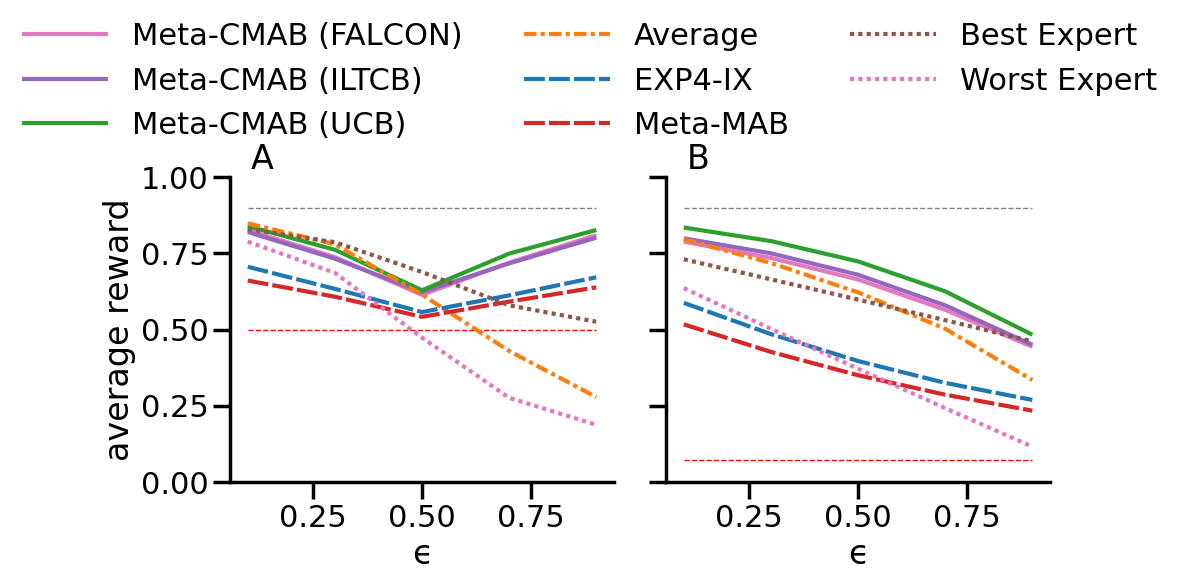

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("poster")
row = None#'variance_spread'
# col = 'Correlation' #None# 'n_clusters'
col = 'shape' #None# 'n_clusters'
style = 'correlated errors'
style = None
x_axis = 'ϵ'
yaxis='average reward'
ALPHA=1


plotdf = gdf[(True)
        # &(gdf.algorithm!='Average') 
                        &alg_mask
                        # &((~gdf.Method.str.contains('Expert'))|(gdf['ϵ']<=0.5))
                        # &((~gdf.Method.str.contains('Expert')))
                        # &(gdf.N==16) 
                        &(gdf['n_trials'].isin([100]))
                        &(gdf['bernoulli'].isin([True]))
                        &(gdf['desired_covar']!=2)
                        &(gdf['n_clusters'].isin([2]))
                        #  &(gdf['variance_spread'].isin([False]))
                        &(~gdf.algorithm.str.contains("expert"))
                        
                        ]

methods = [v for v in plotdf.Method.unique() if v not in ("optimal","random")]
methods=sorted(methods, key =lambda s: ('Meta-CMAB' not in s,'Expert' in s, s))
g = sns.relplot(data=plotdf[(~plotdf.algorithm.str.contains("optimal"))
                                &(~plotdf.algorithm.str.contains("random"))],
                        y=yaxis,x=x_axis,hue="Method",hue_order=methods,palette=palette,ci=None,kind='line',legend=False,style='Method',dashes=linestyles,row=row,col=col)

# for ax_rows,row_name in tqdm(zip(g.axes,col_defaults[row]),total=len(col_defaults[row])):

Ks = sorted(plotdf.K.unique())
labels = "ABCDEFGH"
label_idx = 0
for ax_rows in g.axes:
        for ax,col_name in tqdm(zip(ax_rows,sorted(plotdf[col].unique())),total=len(sorted(plotdf[col].unique()))):

                random_values = plotdf[(plotdf[col]==col_name)&(plotdf.algorithm.str.contains("optimal"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='grey',linestyle='--',linewidth=1)
                random_values = plotdf[(plotdf[col]==col_name)&(plotdf.algorithm.str.contains("random"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='red',linestyle='--',linewidth=1)
                ax.set_title(labels[label_idx].upper()+"                              ")
                label_idx+=1
                # ax.set_xticks([], minor=True)

h = plt.gca().get_lines()
h2=[]
from matplotlib.lines import Line2D
for k in methods:
        h2.append(Line2D([0],[0],color=palette[k],dashes=linestyles[k], label=k))
h=h2#+h[-2:]
new_hues =list( methods)
# new_hues +=  ["Optimal","Random Policy"]

lg = ax.legend(loc='upper center', bbox_to_anchor=(-.2, 1.45+(.15 if True else .25 )),
                fancybox=True, shadow=True, ncol=3,handles=h[:],labels= new_hues,handlelength=2.8, frameon =False)

plt.ylim(0,1)
# plt.xscale('log')
os.makedirs('figures',exist_ok=True)
plt.savefig(f'figures/type_comparison.pdf', bbox_extra_artists=(lg ,) , bbox_inches='tight')

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

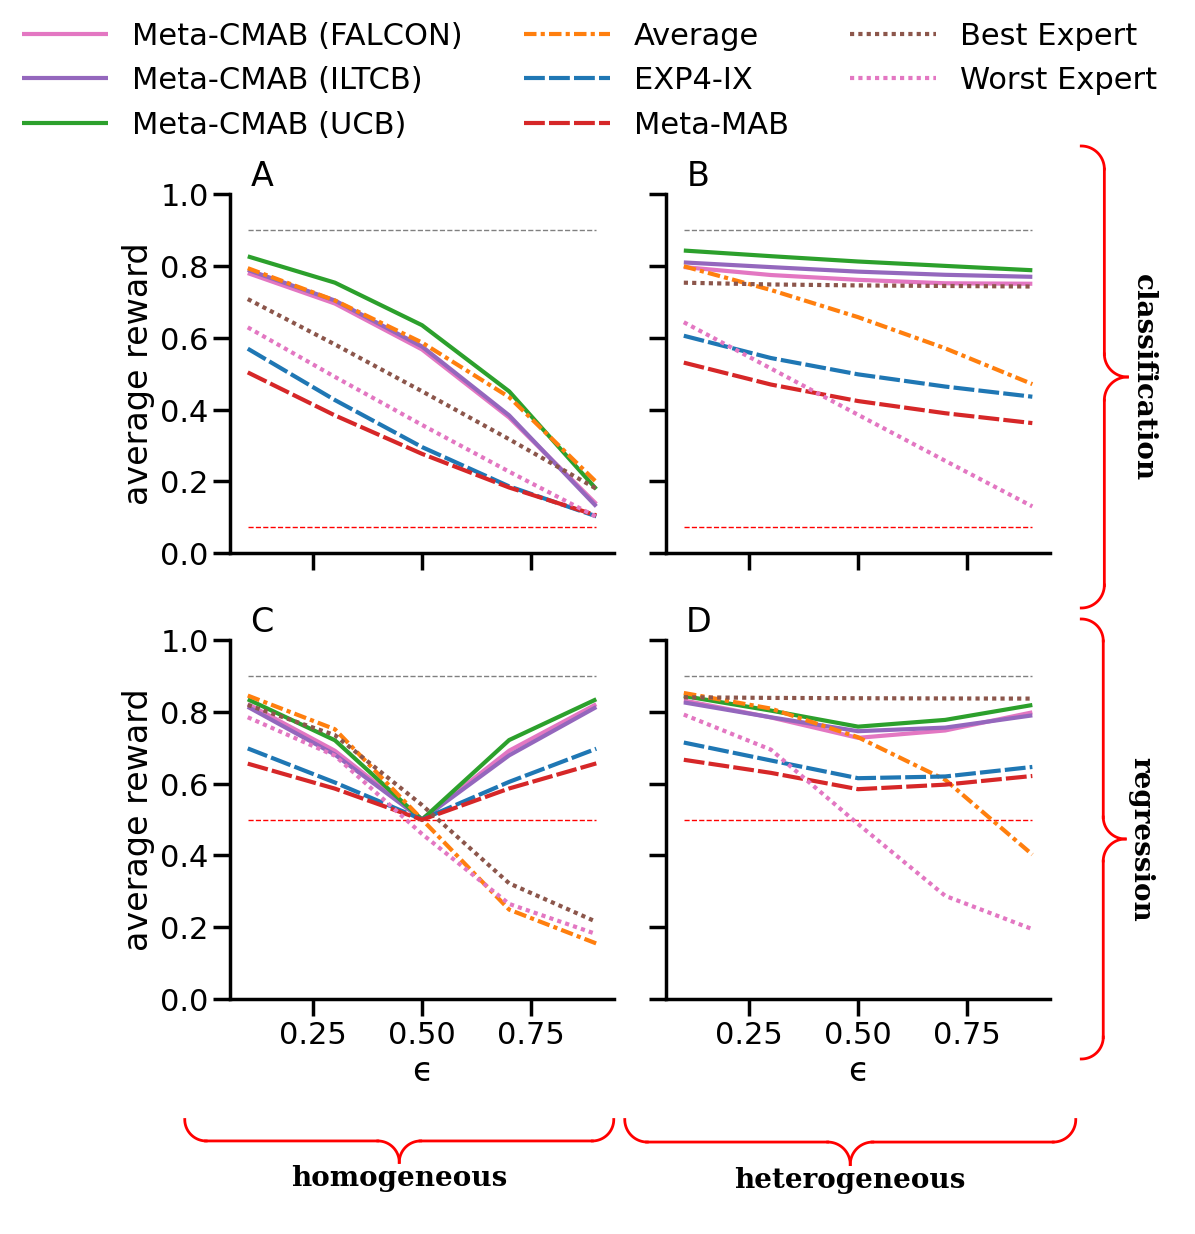

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("poster")
row = 'shape'
# col = 'Correlation' #None# 'n_clusters'
col = 'variance_spread' #None# 'n_clusters'
style = 'correlated errors'
style = None
x_axis = 'ϵ'
yaxis='average reward'
ALPHA=1


plotdf = gdf[(True)
        # &(gdf.algorithm!='Average') 
                        &alg_mask
                        # &((~gdf.Method.str.contains('Expert'))|(gdf['ϵ']<=0.5))
                        # &((~gdf.Method.str.contains('Expert')))
                        # &(gdf.N==16) 
                        # &(gdf['Correlation'].isin(['Low']))
                        &(gdf['n_trials'].isin([100]))
                        &(gdf['bernoulli'].isin([True]))
                        &(gdf['desired_covar']!=2)
                        &(gdf['n_clusters'].isin([2]))
                        #  &(gdf['variance_spread'].isin([False]))
                        &(~gdf.algorithm.str.contains("expert"))
                        
                        ]
row_order = sorted(plotdf[row].unique(),reverse=True)
methods = [v for v in plotdf.Method.unique() if v not in ("optimal","random")]
methods=sorted(methods, key =lambda s: ('Meta-CMAB' not in s,'Expert' in s, s))
g = sns.relplot(data=plotdf[(~plotdf.algorithm.str.contains("optimal"))
                                &(~plotdf.algorithm.str.contains("random"))],
                        y=yaxis,x=x_axis,hue="Method",hue_order=methods,row_order=row_order,palette=palette,ci=None,kind='line',legend=False,style='Method',dashes=linestyles,row=row,col=col)

# for ax_rows,row_name in tqdm(zip(g.axes,col_defaults[row]),total=len(col_defaults[row])):

Ks = sorted(plotdf.K.unique())
labels = "ABCDEFGH"
label_idx = 0
for ax_rows,row_name in zip(g.axes,row_order):
        for ax,col_name in tqdm(zip(ax_rows,sorted(plotdf[col].unique())),total=len(sorted(plotdf[col].unique()))):

                random_values = plotdf[(plotdf[col]==col_name)&(plotdf[row]==row_name)&(plotdf.algorithm.str.contains("optimal"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='grey',linestyle='--',linewidth=1)
                random_values = plotdf[(plotdf[col]==col_name)&(plotdf[row]==row_name)&(plotdf.algorithm.str.contains("random"))].groupby(x_axis).mean().reset_index()[[x_axis,"average reward"]]
                ax.plot(random_values[x_axis].values,random_values['average reward'].values,zorder=0,c='red',linestyle='--',linewidth=1)
                ax.set_title(labels[label_idx].upper()+"                              ")
                label_idx+=1
                # ax.set_xticks([], minor=True)

h = plt.gca().get_lines()
h2=[]
from matplotlib.lines import Line2D
for k in methods:
        h2.append(Line2D([0],[0],color=palette[k],dashes=linestyles[k], label=k))
h=h2#+h[-2:]
new_hues =list( methods)
# new_hues +=  ["Optimal","Random Policy"]

lg = ax.legend(loc='upper center', bbox_to_anchor=(-.2, 2.65+(.15 if True else .25 )),
                fancybox=True, shadow=True, ncol=3,handles=h[:],labels= new_hues,handlelength=2.8, frameon =False)

plt.ylim(0,1)
# plt.xscale('log')
os.makedirs('figures',exist_ok=True)


from curlyBrace import curlyBrace

# coefficient for curly bracket 1
k_r1 = 0.05

font = {'family': 'serif',
        'color':  'k',
        'weight': 'bold',
        # 'style': 'italic',
        'size': 20,
        }


ax2 = plt.axes([0,-0.1,1.1,1.1], facecolor=(1,1,1,0))
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)
# curlyBrace(plt.gcf(), ax2, [0,0.6], [0,.1], k_r1, bool_auto=False, str_text="homogeneous", color='r', lw=2, int_line_num=1, fontdict=font)

curlyBrace(plt.gcf(), ax2,  [0.905,0.55], [0.905,0.15],k_r1, bool_auto=False, str_text="regression", color='r', lw=2, int_line_num=1, fontdict=font)

curlyBrace(plt.gcf(), ax2,   [0.905,.98],[0.905,.56],k_r1, bool_auto=False, str_text="classification", color='r', lw=2, int_line_num=1, fontdict=font)

curlyBrace(plt.gcf(), ax2,  [0.48,0.095], [0.09,0.095],k_r1, bool_auto=False, str_text="homogeneous", color='r', lw=2, int_line_num=1, fontdict=font)

curlyBrace(plt.gcf(), ax2,   [.9,0.095],[0.49,.095],k_r1, bool_auto=False, str_text="heterogeneous", color='r', lw=2, int_line_num=1, fontdict=font)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_xticks([])
ax2.set_yticks([])
plt.savefig(f'figures/type_distr_comparison.pdf', bbox_extra_artists=(lg ,) , bbox_inches='tight')